In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
sns.set(style="ticks")
plt.rc('figure', figsize=(6, 3.7), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", 
       linewidth=0.4, grid=True, labelsize=10)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#EEEEEE', linewidth=0.25)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('savefig', pad_inches=0.3, dpi=300)


The main objectives of this study are as follows:

- To apply data preprocessing and preparation techniques in order to obtain clean data
- To build machine learning models able to predict house price based on house features
- To analyze and compare models performance in order to choose the best model


<h1 id="data-prep">Data  Preparation</h1>

This dataset describes the sales of residential units in Ames, Iowa starting from 2006 until 2010. The dataset contains a large number of variables that are involved in determining a house price.
## Data Description

The dataset contains `2930` records (rows) and `82` features (columns).
Brief description of dataset features. Since the number of features is large (82), we will attach the original data description file to this paper for more information about the dataset. Now, we will mention the feature name with a short description of its meaning.

|Feature|Description|
|-------|-----------|
|MSSubClass| The type of the house involved in the sale|
|MSZoning| The general zoning classification of the sale|
|LotFrontage| Linear feet of street connected to the house|
|LotArea| Lot size in square feet|
|Street| Type of road access to the house|
|Alley| Type of alley access to the house|
|LotShape| General shape of the house|
|LandContour| House flatness|
|Utilities| Type of utilities available|
|LotConfig| Lot configuration|
|LandSlope| House Slope|
|Neighborhood| Locations within Ames city limits|
|Condition1| Proximity to various conditions|
|Condition2| Proximity to various conditions (if more than one is present)|
|BldgType| House type|
|HouseStyle| House style|
|OverallQual| Overall quality of material and finish of the house|
|OverallCond| Overall condition of the house|
|YearBuilt| Construction year|
|YearRemodAdd| Remodel year (if no remodeling nor addition, same as YearBuilt)|
|RoofStyle| Roof type|
|RoofMatl| Roof material|
|Exterior1st| Exterior covering on house|
|Exterior2nd| Exterior covering on house (if more than one material)|
|MasVnrType| Type of masonry veneer|
|MasVnrArea| Masonry veneer area in square feet|
|ExterQual| Quality of the material on the exterior|
|ExterCond| Condition of the material on the exterior|
|Foundation| Foundation type|
|BsmtQual| Basement height|
|BsmtCond| Basement Condition|
|BsmtExposure| Refers to walkout or garden level walls|
|BsmtFinType1| Rating of basement finished area|
|BsmtFinSF1| Type 1 finished square feet|
|BsmtFinType2| Rating of basement finished area (if multiple types)|
|BsmtFinSF2| Type 2 finished square feet|
|BsmtUnfSF| Unfinished basement area in square feet|
|TotalBsmtSF| Total basement area in square feet|
|Heating| Heating type|
|HeatingQC| Heating quality and condition|
|CentralAir| Central air conditioning|
|Electrical| Electrical system type|
|1stFlrSF| First floor area in square feet|
|2ndFlrSF| Second floor area in square feet|
|LowQualFinSF| Low quality finished square feet in all floors|
|GrLivArea| Above-ground living area in square feet|
|BsmtFullBath| Basement full bathrooms|
|BsmtHalfBath| Basement half bathrooms|
|FullBath| Full bathrooms above ground|
|HalfBath| Half bathrooms above ground|
|Bedroom| Bedrooms above ground|
|Kitchen| Kitchens above ground|
|KitchenQual| Kitchen quality|
|TotRmsAbvGrd| Total rooms above ground (excluding bathrooms)|
|Functional| Home functionality|
|Fireplaces| Number of fireplaces|
|FireplaceQu| Fireplace quality|
|GarageType| Garage location|
|GarageYrBlt| Year garage was built in|
|GarageFinish| Interior finish of the garage|
|GarageCars| Size of garage (in car capacity)|
|GarageArea| Garage size in square feet|
|GarageQual| Garage quality|
|GarageCond| Garage condition|
|PavedDrive| How driveway is paved|
|WoodDeckSF| Wood deck area in square feet|
|OpenPorchSF| Open porch area in square feet|
|EnclosedPorch| Enclosed porch area in square feet|
|3SsnPorch| Three season porch area in square feet|
|ScreenPorch| Screen porch area in square feet|
|PoolArea| Pool area in square feet|
|PoolQC| Pool quality|
|Fence| Fence quality|
|MiscFeature| Miscellaneous feature|
|MiscVal| Value of miscellaneous feature|
|MoSold| Sale month|
|YrSold| Sale year|
|SaleType| Sale type|
|SaleCondition| Sale condition|

## Reading the Dataset



In [ ]:
import pandas as pd
import numpy as np

dataset = pd.read_csv("/content/AmesHousing.csv")

Displaying the first few rows of the dataset to get a feel of it:

In [ ]:
# Configuring float numbers format
pd.options.display.float_format = '{:20.2f}'.format
dataset.head(n=5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.00,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.00,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.00,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.00,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Statistical Informations

In [ ]:
dataset.describe(include=[np.number], percentiles=[.5]) \
    .transpose().drop("count", axis=1)

,mean,std,min,50%,max
Order,1465.50,845.96,1.00,1465.50,2930.00
PID,714464496.99,188730844.65,526301100.00,535453620.00,1007100110.00
MS SubClass,57.39,42.64,20.00,50.00,190.00
Lot Frontage,69.22,23.37,21.00,68.00,313.00
Lot Area,10147.92,7880.02,1300.00,9436.50,215245.00
Overall Qual,6.09,1.41,1.00,6.00,10.00
Overall Cond,5.56,1.11,1.00,5.00,9.00
Year Built,1971.36,30.25,1872.00,1973.00,2010.00
Year Remod/Add,1984.27,20.86,1950.00,1993.00,2010.00
Mas Vnr Area,101.90,179.11,0.00,0.00,1600.00


for example, that the average lot area of the houses in our dataset is 10,147.92 sq.ft  with a standard deviation of 7,880.02 sq.ft. I can see also that the minimum lot area is 1,300 sq.ft and the maximum lot area is 215,245 sq.ft with a median of 9,436.5 sq.ft. Similarly, I can get a lot of information about our dataset variables from the table.
statistical information about the non-numerical columns in our dataset:

In [ ]:
dataset.describe(include=[np.object]).transpose() \
    .drop("count", axis=1)

,unique,top,freq
MS Zoning,7,RL,2273
Street,2,Pave,2918
Alley,2,Grvl,120
Lot Shape,4,Reg,1859
Land Contour,4,Lvl,2633
Utilities,3,AllPub,2927
Lot Config,5,Inside,2140
Land Slope,3,Gtl,2789
Neighborhood,28,NAmes,443
Condition 1,9,Norm,2522


`count` represents the number of non-null values in each column, `unique` represents the number of unique values, `top` represents the most frequent element, and `freq` represents the frequency of the most frequent element.


### Dealing with Missing Values

some machine learning models don't accept data with missing values.The number of missing values in our dataset. We want to see the number and the percentage of missing values for each column that actually contains missing values.

In [ ]:
# Getting the number of missing values in each column
num_missing = dataset.isna().sum()
# Excluding columns that contains 0 missing values
num_missing = num_missing[num_missing > 0]
# Getting the percentages of missing values
percent_missing = num_missing * 100 / dataset.shape[0]
# Concatenating the number and perecentage of missing values 
# into one dataframe and sorting it
pd.concat([num_missing, percent_missing], axis=1, 
          keys=['Missing Values', 'Percentage']).\
          sort_values(by="Missing Values", ascending=False)

,Missing Values,Percentage
Pool QC,2917,99.56
Misc Feature,2824,96.38
Alley,2732,93.24
Fence,2358,80.48
Fireplace Qu,1422,48.53
Lot Frontage,490,16.72
Garage Cond,159,5.43
Garage Qual,159,5.43
Garage Finish,159,5.43
Garage Yr Blt,159,5.43


dealing with these missing values.

##### Pool QC

The percentage of missing values in `Pool QC` column is 99.56% which is very high. I think that a missing value in this column denotes that the corresponding house doesn't have a pool. To verify this, let's take a look at the values of `Pool Area` column:

In [ ]:
dataset["Pool Area"].value_counts()

0      2917
144       1
480       1
576       1
555       1
368       1
444       1
228       1
561       1
519       1
648       1
800       1
512       1
738       1
Name: Pool Area, dtype: int64

 there are 2917 entries in `Pool Area` column that have a value of 0. This verfies our hypothesis that each house without a pool has a missing value in `Pool QC` column and a value of 0 in `Pool Area` column.filling the missing values in `Pool QC` column with `"No Pool"`:

In [ ]:
dataset["Pool QC"].fillna("No Pool", inplace=True)

##### Misc Feature

The percentage of missing values in Pool QC column is 96.38% which is very high also. Let's take a look at the values of `Misc Val` column:

In [ ]:
dataset["Misc Val"].value_counts()

0        2827
400        18
500        13
450         9
600         8
700         7
2000        7
1500        3
1200        3
650         3
480         2
3000        2
2500        2
4500        2
455         1
1512        1
17000       1
1000        1
15500       1
460         1
8300        1
1300        1
560         1
620         1
900         1
1150        1
6500        1
1400        1
750         1
800         1
12500       1
350         1
490         1
80          1
54          1
3500        1
300         1
420         1
Name: Misc Val, dtype: int64

`Misc Val` column has 2827 entries with a value of 0. `Misc Feature` has 2824 missing values. Then, as with `Pool QC`, I can say that each house without a "miscellaneous feature" has a missing value in `Misc Feature` column and a value of 0 in `Misc Val` column.fillING the missing values in `Misc Feature` column with `"No Feature"`:

In [ ]:
dataset['Misc Feature'].fillna('No feature', inplace=True)

##### Alley,  Fence, and Fireplace Qu

According to the dataset documentation, `NA` in `Alley`, `Fence`, and `Fireplace Qu` columns denotes that the house doesn't have an alley, fence, or fireplace. So filling in the missing values in these columns with `"No Alley"`, `"No Fence"`, and `"No Fireplace"` accordingly:

In [ ]:
dataset['Alley'].fillna('No Alley', inplace=True)
dataset['Fence'].fillna('No Fence', inplace=True)
dataset['Fireplace Qu'].fillna('No Fireplace', inplace=True)

##### Lot Frontage
 `Lot Frontage` represents the linear feet of street connected to the house. So we assume that the missing values in this column indicates that the house is not connected to any street, and filling in the missing values with 0:

In [ ]:
dataset['Lot Frontage'].fillna(0, inplace=True)

##### Garage Cond, Garage Qual, Garage Finish, Garage Yr Blt, Garage Type, Garage Cars, and Garage Area

`NA` in `Garage Cond`, `Garage Qual`, `Garage Finish`, and `Garage Type` indicates that there is no garage in the house. So we fill in the missing values in these columns with `"No Garage"`.  notice that `Garage Cond`, `Garage Qual`, `Garage Finish`, `Garage Yr Blt` columns have 159 missing values, but `Garage Type` has 157 and both `Garage Cars` and `Garage Area` have one missing value. Let's take a look at the row that contains the missing value in `Garage Cars`:

In [ ]:
garage_columns = [col for col in dataset.columns if col.startswith("Garage")]
dataset[dataset['Garage Cars'].isna()][garage_columns]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
2236,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


this is the same row that contains the missing value in `Garage Area`, and that all garage columns except `Garage Type` are null in this row, so filling the missing values in `Garage Cars` and `Garage Area` with 0.

there are 2 rows where `Garage Type` is not null while `Garage Cond`, `Garage Qual`, `Garage Finish`, and `Garage Yr Blt` columns are null. Let's take a look at these two rows:

In [ ]:
dataset[~pd.isna(dataset['Garage Type']) & 
        pd.isna(dataset['Garage Qual'])][garage_columns]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
1356,Detchd,NaN,NaN,1.00,360.00,NaN,NaN
2236,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


replace the values of `Garage Type` with `"No Garage"` in these two rows also.

For `Garage Yr Blt`, filling in missing values with 0 since this is a numerical column:

In [ ]:
dataset['Garage Cars'].fillna(0, inplace=True)
dataset['Garage Area'].fillna(0, inplace=True)

dataset.loc[~pd.isna(dataset['Garage Type']) & 
            pd.isna(dataset['Garage Qual']), "Garage Type"] = "No Garage"

for col in ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']:
    dataset[col].fillna('No Garage', inplace=True)
    
dataset['Garage Yr Blt'].fillna(0, inplace=True)

##### Bsmt Exposure, BsmtFin Type 2, BsmtFin Type 1, Bsmt Qual, Bsmt Cond, Bsmt Half Bath, Bsmt Full Bath, Total Bsmt SF, Bsmt Unf SF, BsmtFin SF 2, and BsmtFin SF 1


According to the dataset documentation, `NA` in any of the first five of these columns indicates that there is no basement in the house. So filling in the missing values in these columns with `"No Basement"`. We notice that the first five of these columns have 80 missing values, but `BsmtFin Type 2` has 81, `Bsmt Exposure` has 83, `Bsmt Half Bath` and `Bsmt Full Bath` each has 2, and each of the others has 1. 
look at the rows where `Bsmt Half Bath` is null:

In [ ]:
bsmt_columns = [col for col in dataset.columns if "Bsmt" in col]
dataset[dataset['Bsmt Half Bath'].isna()][bsmt_columns]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
1341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1497,NaN,NaN,NaN,NaN,0.00,NaN,0.00,0.00,0.00,NaN,NaN


 these are the same rows that contain the missing values in `Bsmt Full Bath`, and that one of these two rows is contains the missing value in each of `Total Bsmt SF`, `Bsmt Unf SF`, `BsmtFin SF 2`, and `BsmtFin SF 1` columns.notice also that `Bsmt Exposure`, `BsmtFin Type 2`, `BsmtFin Type 1`, `Bsmt Qual`, and `Bsmt Cond` are null in these rows, so we will fill the missing values in `Bsmt Half Bath`, `Bsmt Full Bath`, `Total Bsmt SF`, `Bsmt Unf SF`, `BsmtFin SF 2`, and `BsmtFin SF 1` columns with 0.

I saw that there are 3 rows where `Bsmt Exposure` is null while `BsmtFin Type 1`, `Bsmt Qual`, and `Bsmt Cond` are not null.look at these three rows:

In [ ]:
dataset[~pd.isna(dataset['Bsmt Cond']) & 
        pd.isna(dataset['Bsmt Exposure'])][bsmt_columns]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
66,Gd,TA,NaN,Unf,0.00,Unf,0.00,1595.00,1595.00,0.00,0.00
1796,Gd,TA,NaN,Unf,0.00,Unf,0.00,725.00,725.00,0.00,0.00
2779,Gd,TA,NaN,Unf,0.00,Unf,0.00,936.00,936.00,0.00,0.00


filling in the missing values in `Bsmt Exposure` for these three rows with `"No"`. According to the dataset documentation, `"No"` for `Bsmt Exposure` means "No Exposure":

take a look at the row where `BsmtFin Type 2` is null while `BsmtFin Type 1`, `Bsmt Qual`, and `Bsmt Cond` are not null:

In [ ]:
dataset[~pd.isna(dataset['Bsmt Cond']) & 
        pd.isna(dataset['BsmtFin Type 2'])][bsmt_columns]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
444,Gd,TA,No,GLQ,1124.00,NaN,479.00,1603.00,3206.00,1.00,0.00


 filling in the missing value in `BsmtFin Type 2` for this row with `"Unf"`. According to the dataset documentation, `"Unf"` for `BsmtFin Type 2` means "Unfinished":

In [ ]:
for col in ["Bsmt Half Bath", "Bsmt Full Bath", "Total Bsmt SF", 
            "Bsmt Unf SF", "BsmtFin SF 2", "BsmtFin SF 1"]:
    dataset[col].fillna(0, inplace=True)

dataset.loc[~pd.isna(dataset['Bsmt Cond']) & 
            pd.isna(dataset['Bsmt Exposure']), "Bsmt Exposure"] = "No"
dataset.loc[~pd.isna(dataset['Bsmt Cond']) & 
            pd.isna(dataset['BsmtFin Type 2']), "BsmtFin Type 2"] = "Unf"

for col in ["Bsmt Exposure", "BsmtFin Type 2", 
            "BsmtFin Type 1", "Bsmt Qual", "Bsmt Cond"]:
    dataset[col].fillna("No Basement", inplace=True)

##### Mas Vnr Area and Mas Vnr Type

Each of these two columns have 23 missing values. filling in these missing values with `"None"` for `Mas Vnr Type` and with 0 for `Mas Vnr Area`. useing `"None"` for `Mas Vnr Type` because in the dataset documentation, `"None"` for `Mas Vnr Type` means "None" (i.e. no masonry veneer):

In [ ]:
dataset['Mas Vnr Area'].fillna(0, inplace=True)
dataset['Mas Vnr Type'].fillna("None", inplace=True)

##### Electrical

This column has one missing value. filling in this value with the mode of this column:

In [ ]:
dataset['Electrical'].fillna(dataset['Electrical'].mode()[0], inplace=True)

checking if there is any remaining missing value in our dataset:

In [ ]:
dataset.isna().values.sum()

0


## Outlier Removal
 there are five unusual values and outliers in the dataset, and encourages the removal of these outliars. plotting `SalePrice` against `Gr Liv Area` to spot the outliers. 

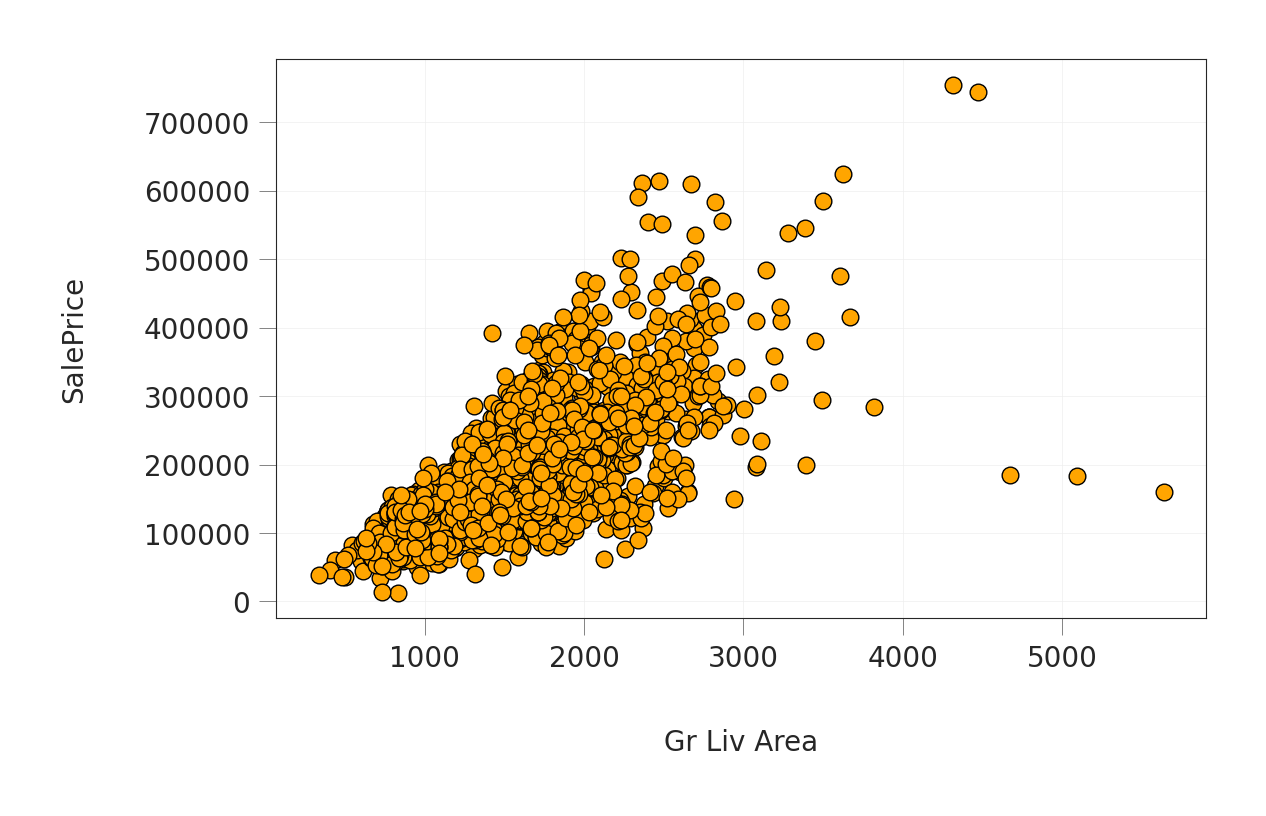

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.scatter(x=dataset['Gr Liv Area'], y=dataset['SalePrice'], 
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("Gr Liv Area"); plt.ylabel("SalePrice");

clearly see the five values meant by the authour in the plot above.removing them from our dataset.keeping data points that have `Gr Liv Area` less than 4,000. But first Itake a look at the dataset rows that correspond to these unusual values:

In [ ]:
outlirt_columns = ["Gr Liv Area"] + \
                  [col for col in dataset.columns if "Sale" in col]
dataset[dataset["Gr Liv Area"] > 4000][outlirt_columns]

,Gr Liv Area,Sale Type,Sale Condition,SalePrice
1498,5642,New,Partial,160000
1760,4476,WD,Abnorml,745000
1767,4316,WD,Normal,755000
2180,5095,New,Partial,183850
2181,4676,New,Partial,184750


removeing them:

In [ ]:
dataset = dataset[dataset["Gr Liv Area"] < 4000]

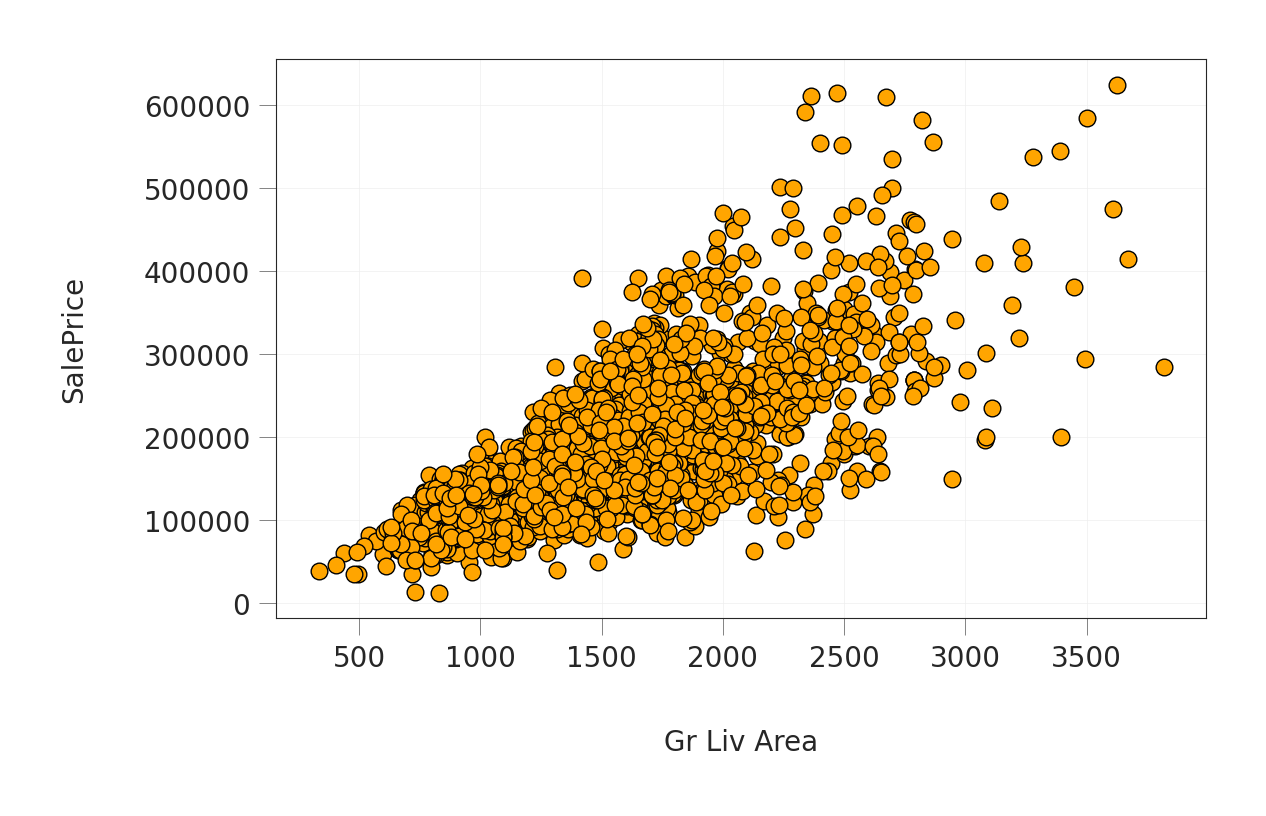

In [ ]:
plt.scatter(x=dataset['Gr Liv Area'], y=dataset['SalePrice'], 
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("Gr Liv Area"); plt.ylabel("SalePrice");

To avoid problems in modeling later, resetting our dataset index after removing the outlier rows, so no gaps remain in our dataset index:

In [ ]:
dataset.reset_index(drop=True, inplace=True)

## Deleting Some Unimportant Columns

deleteing columns that are not useful in our analysis. The columns to be deleted are `Order` and `PID`:

In [ ]:
dataset.drop(['Order', 'PID'], axis=1, inplace=True)



## Target Variable Distribution

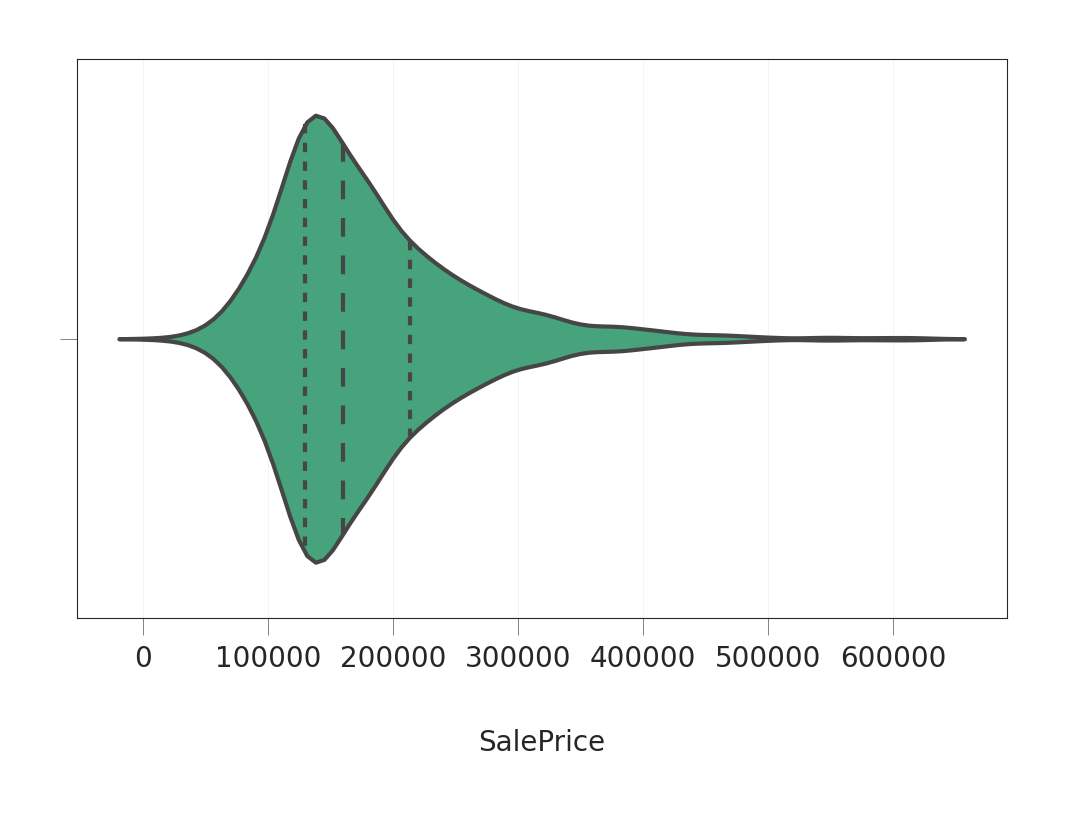

In [ ]:
sns.violinplot(x=dataset['SalePrice'], inner="quartile", color="#36B37E");

 the plot that most house prices fall between 100,000 and 250,000. The dashed lines represent the locations of the three quartiles Q1, Q2 (the median), and see the box plot of `SalePrice`:

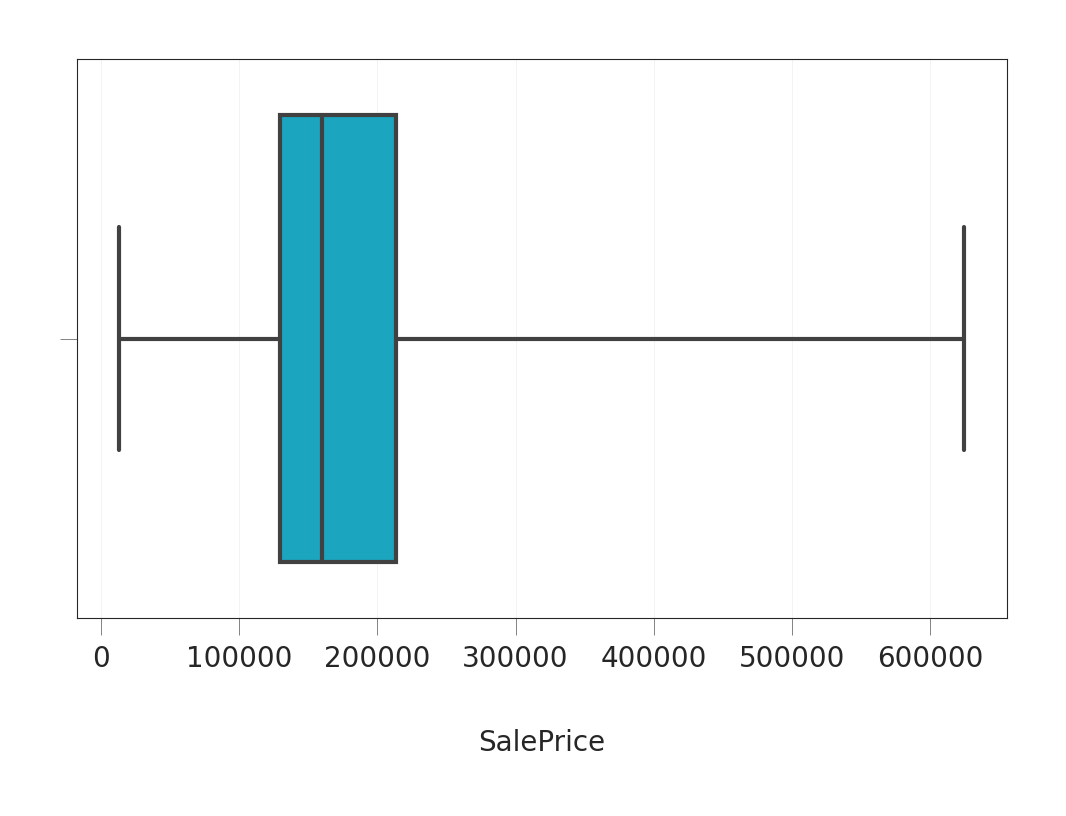

In [ ]:
sns.boxplot(dataset['SalePrice'], whis=10, color="#00B8D9");

This shows us the minimum and maximum values of `SalePrice`. It shows us also the three quartiles represented by the box and the vertical line inside of it. Lastly, plot the histogram of the variable to see a more detailed view of the distribution:

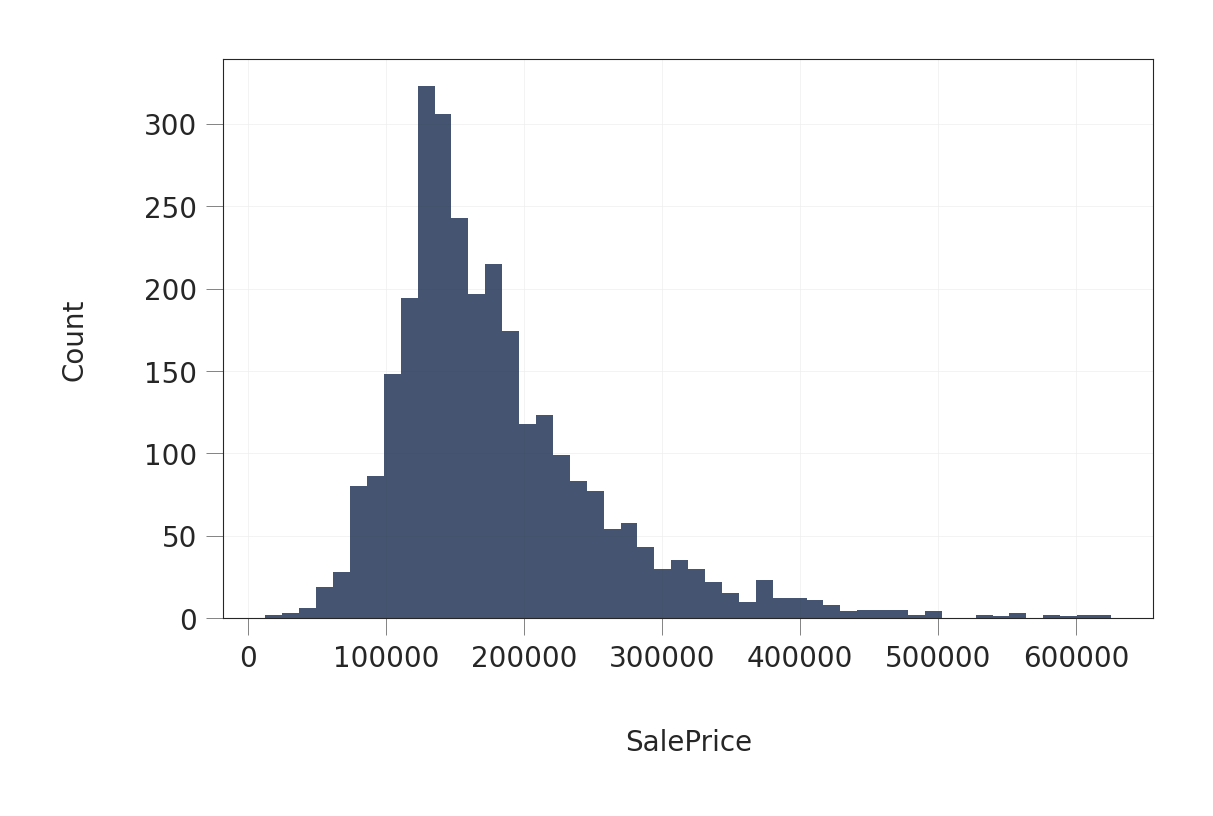

In [ ]:
sns.distplot(dataset['SalePrice'], kde=False, 
             color="#172B4D", hist_kws={"alpha": 0.8});
plt.ylabel("Count");

## Correlation Between Variables

Correlation is represented as a value between -1 and +1 where +1 denotes the highest positive correlation, -1 denotes the highest negative correlation, and 0 denotes that there is no correlation.
I will show correlation between our dataset variables (numerical and boolean variables only) using a heatmap graph:

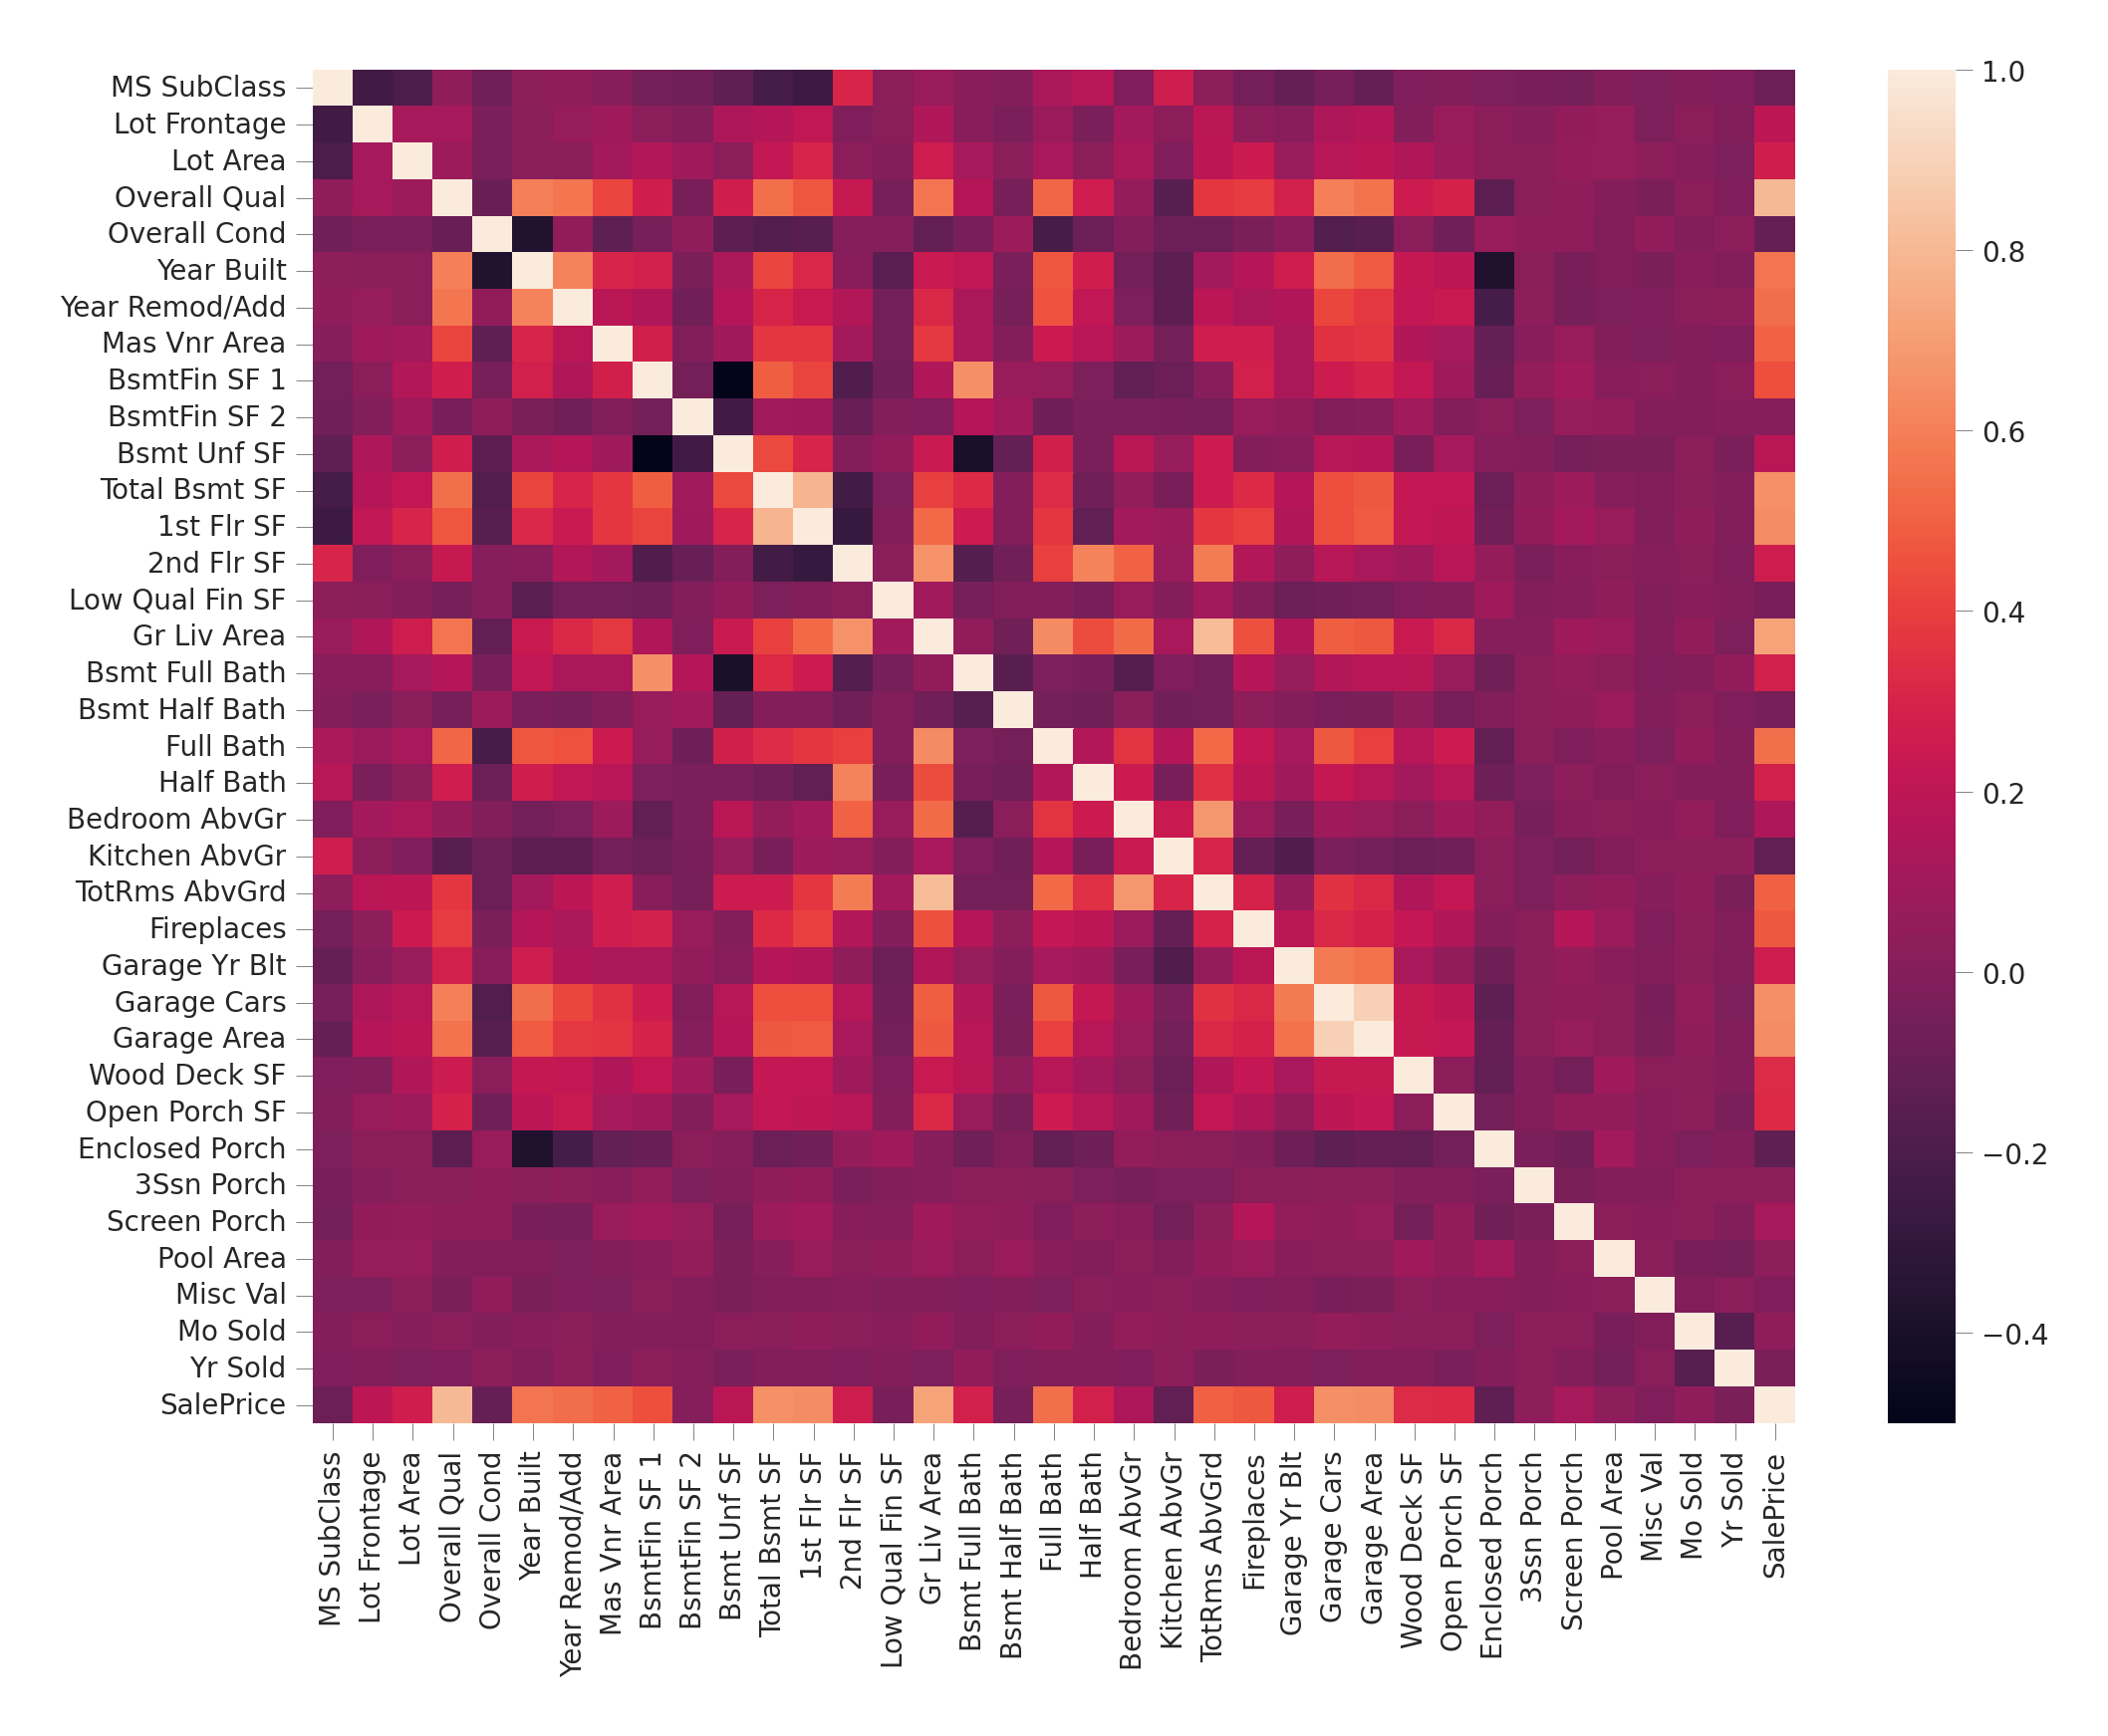

In [ ]:
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(dataset.corr(), ax=ax);

 notice that `Garage Cars` and `Garage Area` have high positive correlation which is reasonable because when the garage area increases, its car capacity increases too. We see also that `Gr Liv Area` and `TotRms AbvGrd` are highly positively correlated which also makes sense because when living area above ground increases, it is expected for the rooms above ground to increase too. 

Regarding negative correlation, we can see that `Bsmt Unf SF` is negatively correlated with `BsmtFin SF 1`, and that makes sense because when we have more unfinished area, this means that we have less finished area. We note also that `Bsmt Unf SF` is negatively correlated with `Bsmt Full Bath` which is reasonable too.

Most importantly,I want to look at the predictor variables that are correlated with the target variable (`SalePrice`). By looking at the last row of the heatmap, we see that the target variable is highly positively correlated with `Overall Qual` and `Gr Liv Area`. We see also that the target variable is positively correlated with `Year Built`, `Year Remod/Add`, `Mas Vnr Area`, `Total Bsmt SF`, `1st Flr SF`, `Full Bath`, `Garage Cars`, and `Garage Area`.

### Relatioships Between the Target Variable and Other Varibles

#### High Positive Correlation

Firstly,visualize the relationships between the target variable and the variables that are highly and positively correlated with it, according to what we saw in the heatmap. Namely, these variables are `Overall Qual` and `Gr Liv Area`. We start with the relatioship between the target variable and `Overall Qual`, but before that, let's see the distribution of each of them. Let's start with the target variable `SalePrice`:

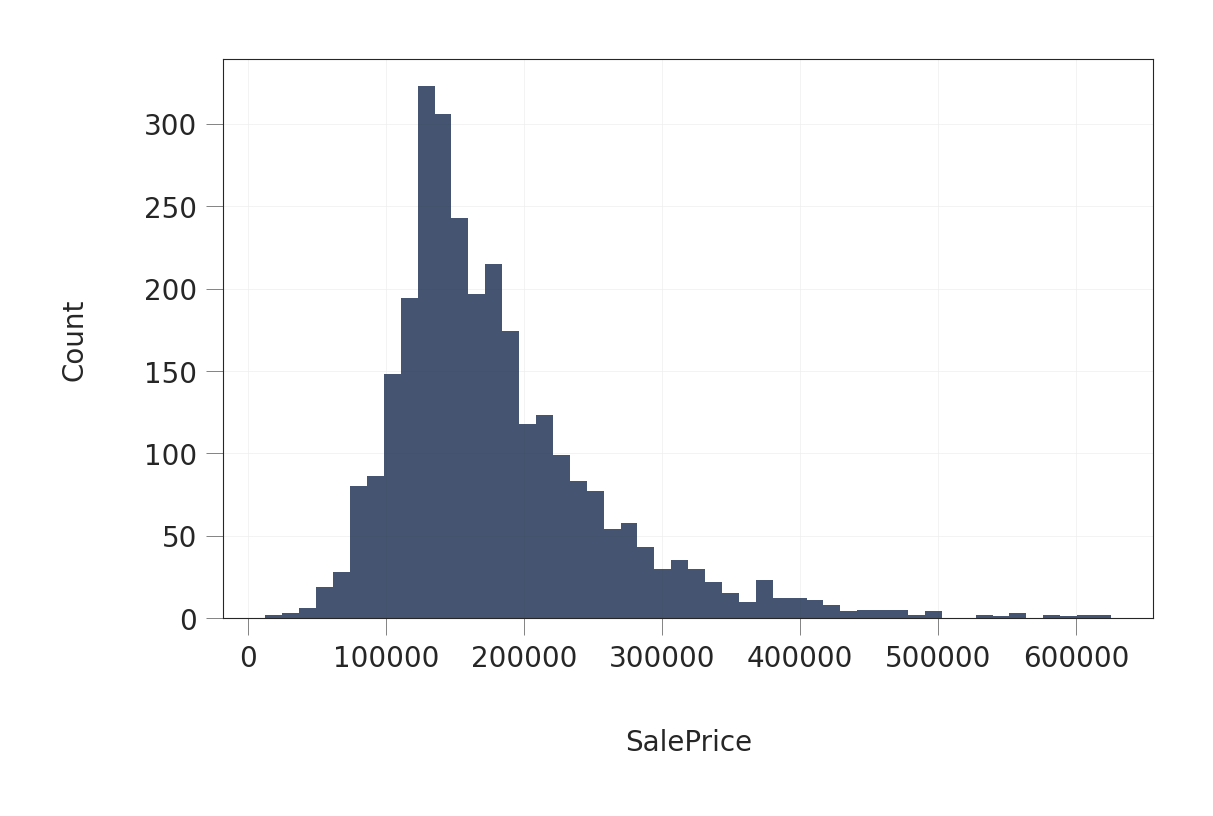

In [ ]:
sns.distplot(dataset['SalePrice'], kde=False, 
             color="#172B4D", hist_kws={"alpha": 0.8});
plt.ylabel("Count");

 most house prices fall between 100,000 and 200,000. We see also that there is a number of expensive houses to the right of the plot. Now, see the distribution of `Overall Qual` variable:

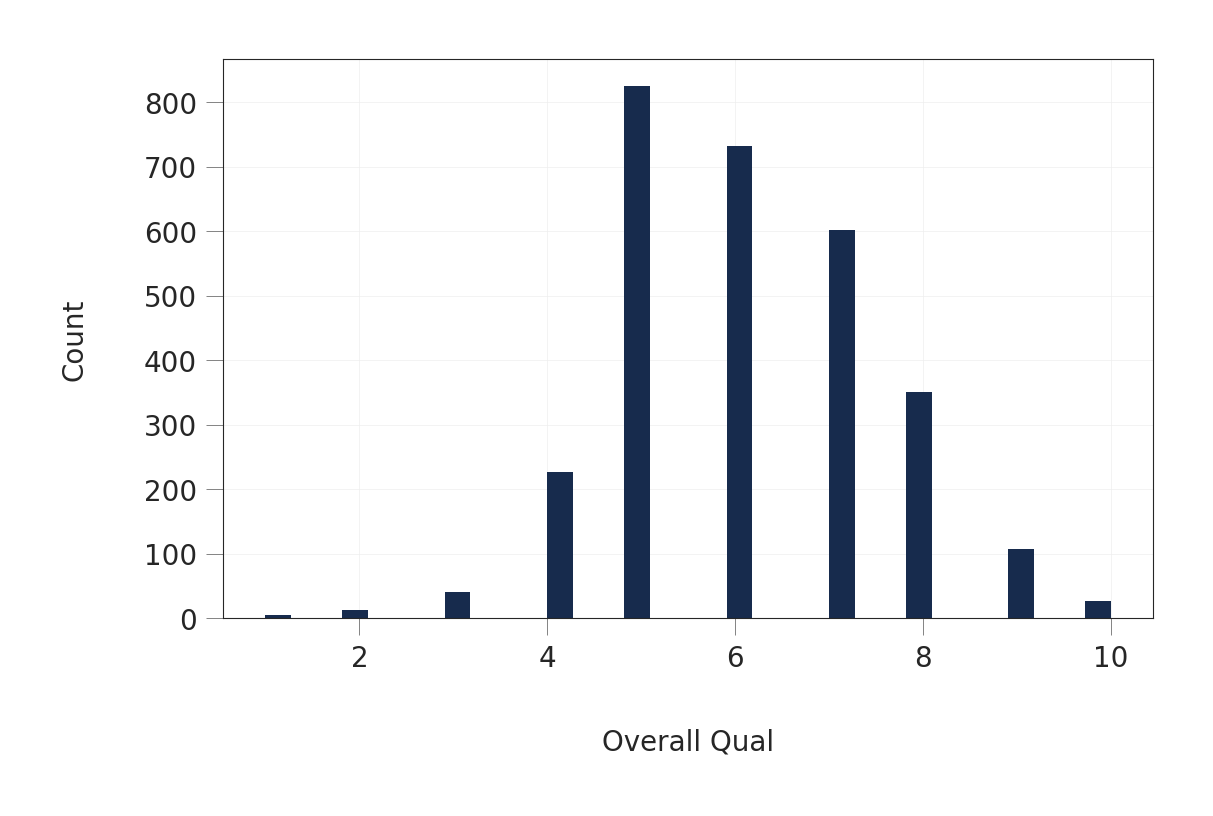

In [ ]:
sns.distplot(dataset['Overall Qual'], kde=False, 
             color="#172B4D", hist_kws={"alpha": 1});
plt.ylabel("Count");

see that `Overall Qual` takes an integer value between 1 and 10, and that most houses have an overall quality between 5 and 7. Now we plot the scatter plot of `SalePrice` and `Overall Qual` to see the relationship between them:

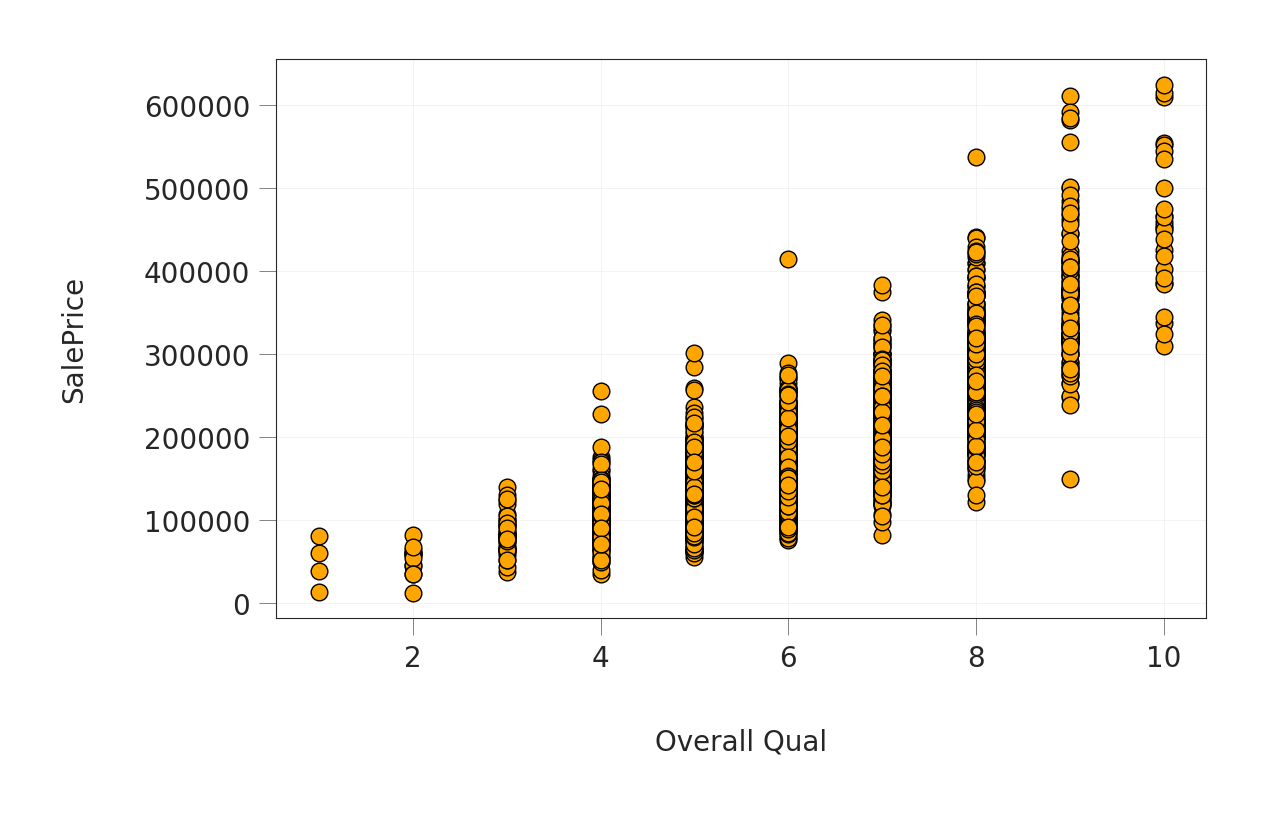

In [ ]:
plt.scatter(x=dataset['Overall Qual'], y=dataset['SalePrice'], 
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("Overall Qual"); plt.ylabel("SalePrice");

 see that they are truly positively correlated; generally, as the overall quality increases, the sale price increases too. This verfies what I got from the heatmap above.

Now,see the relationship between the target variable and `Gr Liv Area` variable which represents the living area above ground.  distribution of `Gr Liv Area`:

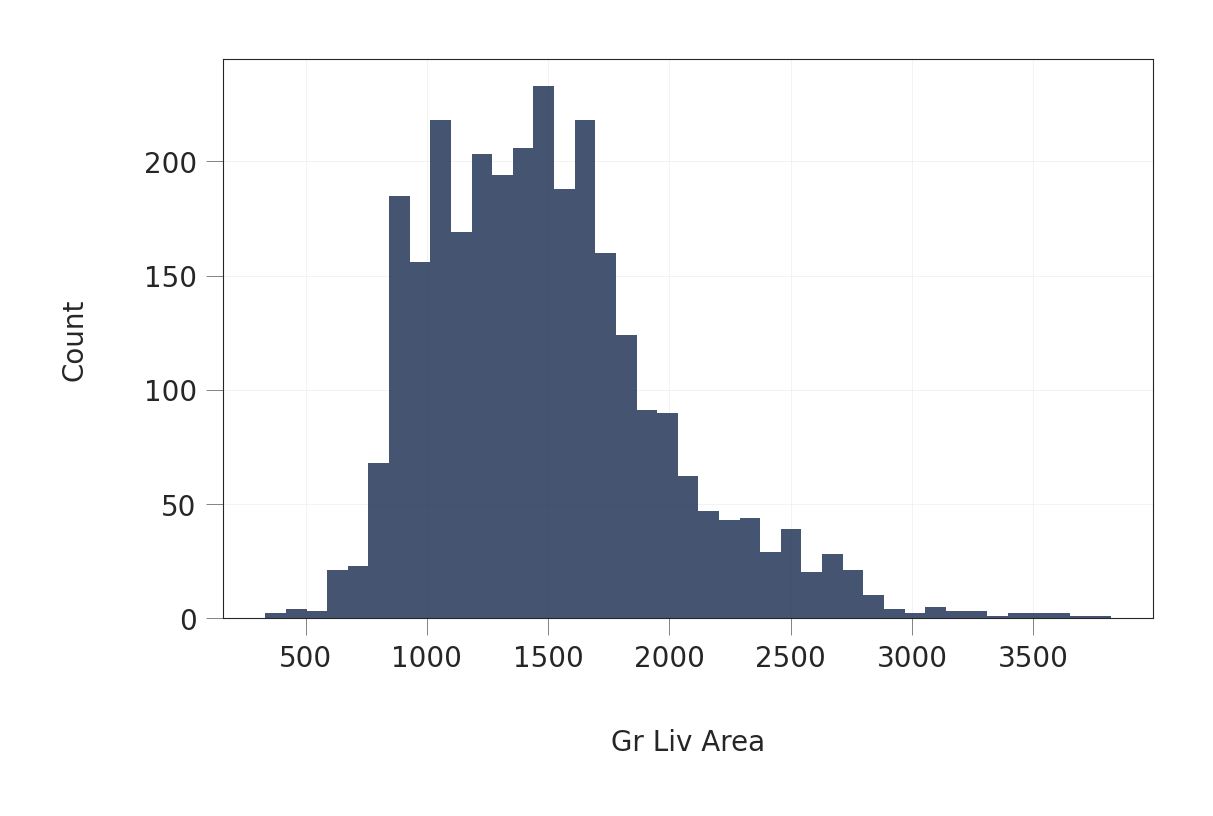

In [ ]:
sns.distplot(dataset['Gr Liv Area'], kde=False, 
             color="#172B4D", hist_kws={"alpha": 0.8});
plt.ylabel("Count");

above-ground living area falls approximately between 800 and 1800 SQ.FT . Now, the relationship between `Gr Liv Area` and the target variable:

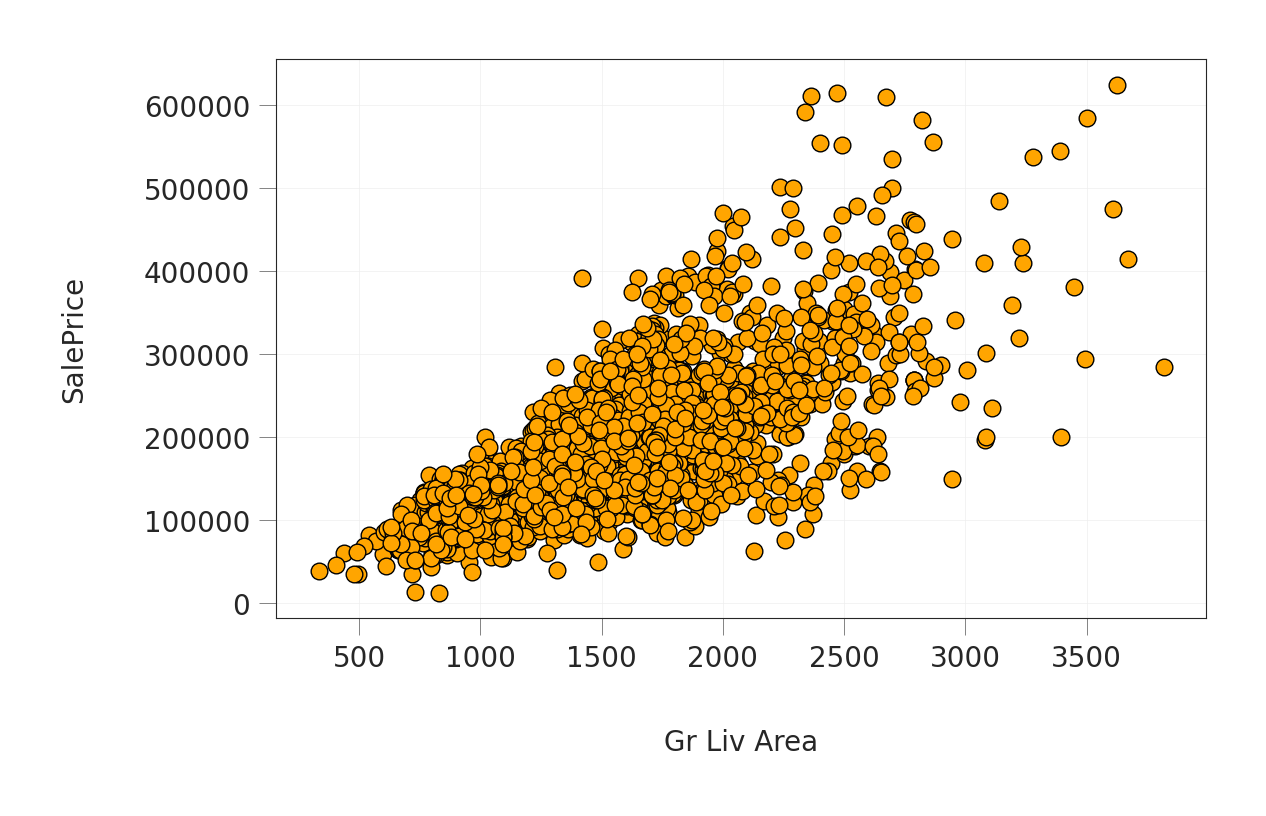

In [ ]:
plt.scatter(x=dataset['Gr Liv Area'], y=dataset['SalePrice'], 
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("Gr Liv Area"); plt.ylabel("SalePrice");

The scatter plot above shows clearly the strong positive correlation between `Gr Liv Area` and `SalePrice`

#### Moderate Positive Correlation
visualize the relationship between the target variable and the variables that are positively correlated with it, but the correlation is not very strong. Namely, these variables are `Year Built`, `Year Remod/Add`, `Mas Vnr Area`, `Total Bsmt SF`, `1st Flr SF`, `Full Bath`, `Garage Cars`, and `Garage Area`. We start with the first four. the distribution of each of them:

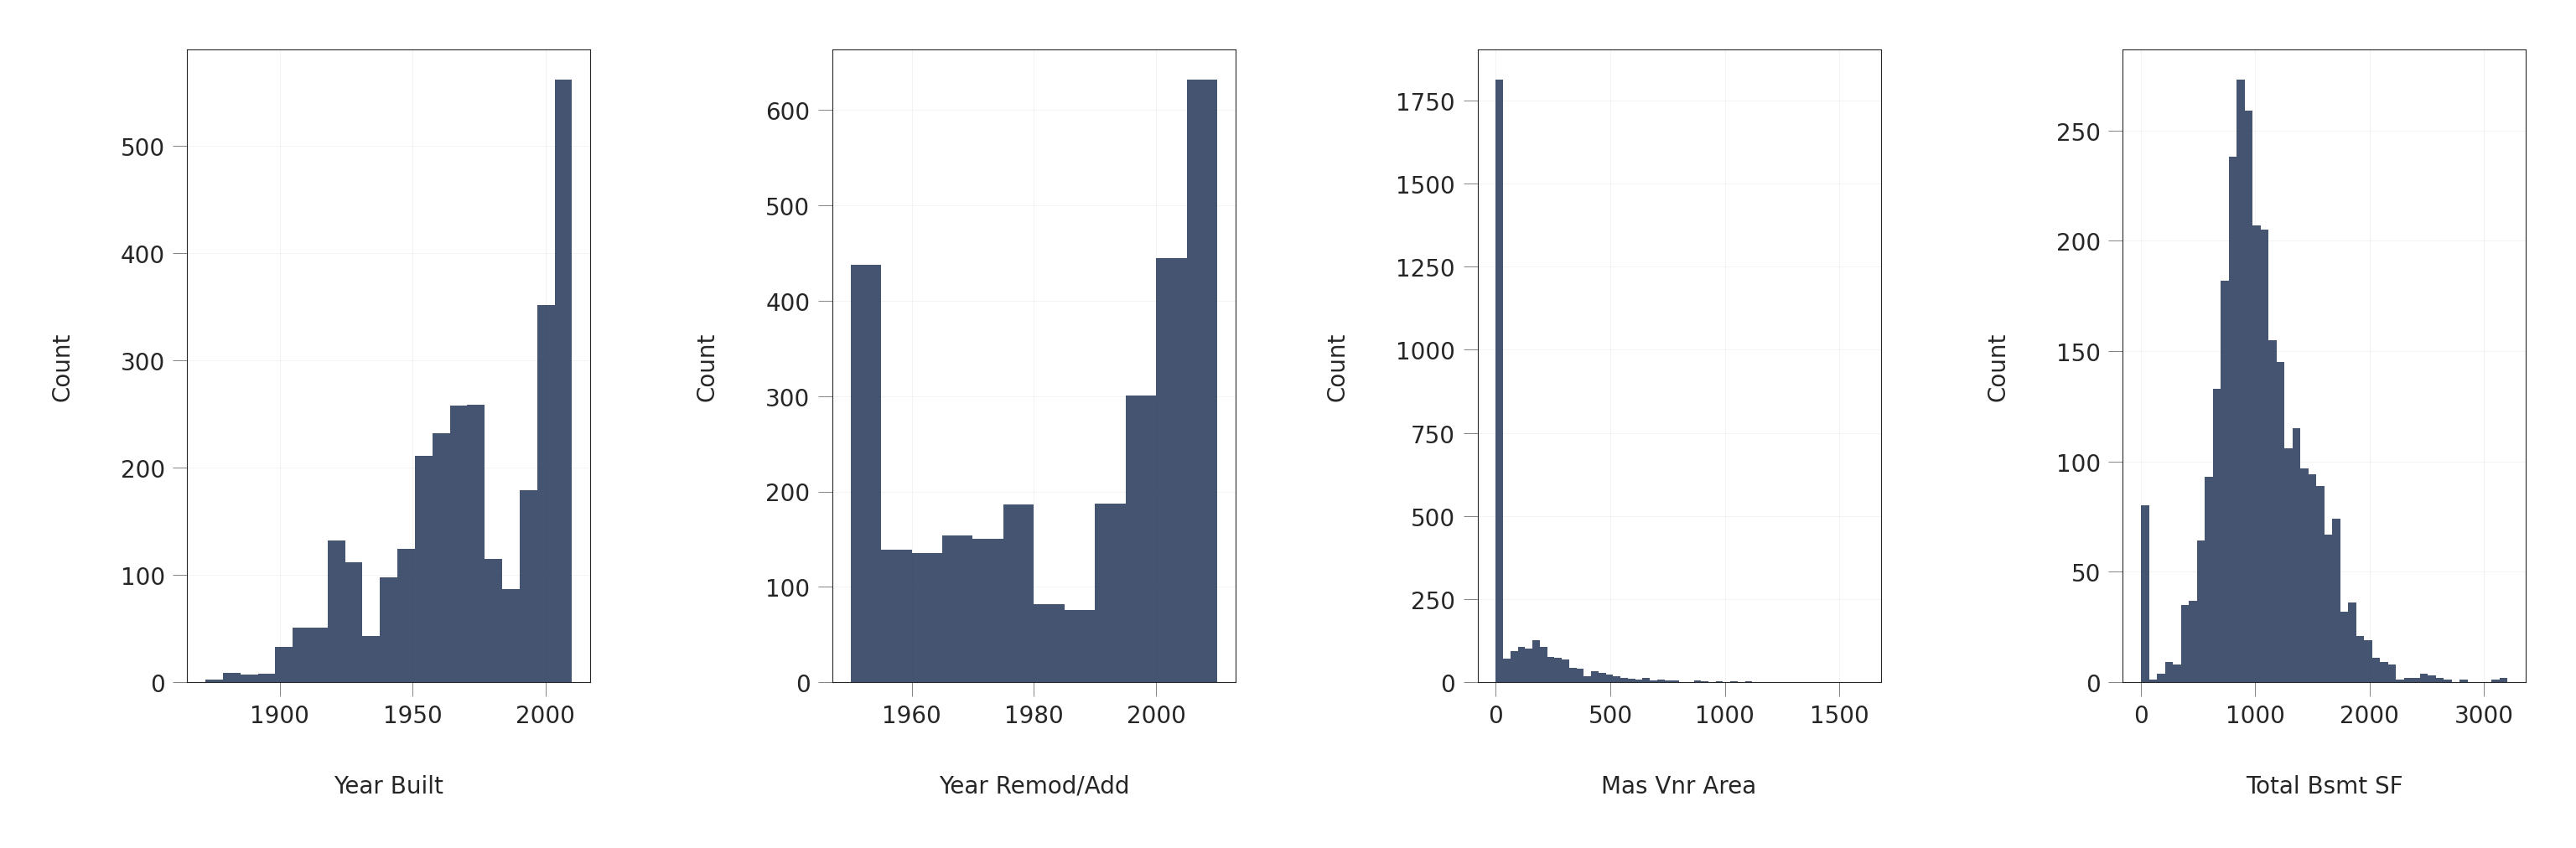

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(18,5))
fig.subplots_adjust(hspace=0.5, wspace=0.6)
for ax, v in zip(axes.flat, ["Year Built", "Year Remod/Add", 
                             "Mas Vnr Area", "Total Bsmt SF"]):
    sns.distplot(dataset[v], kde=False, color="#172B4D", 
                 hist_kws={"alpha": 0.8}, ax=ax)
    ax.set(ylabel="Count");

their relationships with the target variable using scatter plots:

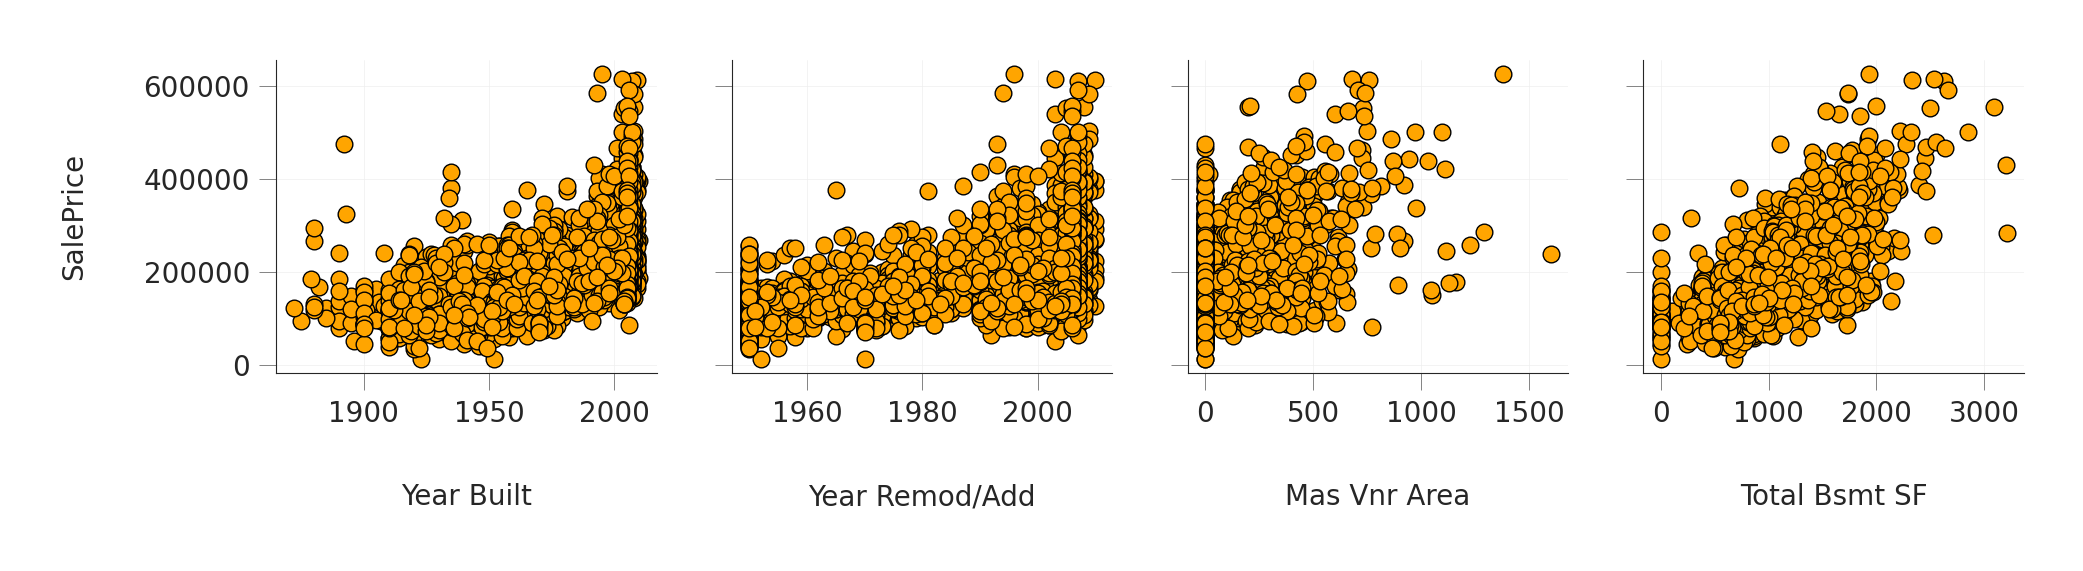

In [ ]:
x_vars = ["Year Built", "Year Remod/Add", "Mas Vnr Area", "Total Bsmt SF"]
g = sns.PairGrid(dataset, y_vars=["SalePrice"], x_vars=x_vars);
g.map(plt.scatter, color="orange", edgecolors="#000000", linewidths=0.5);

the last four.  the distribution of each of them:

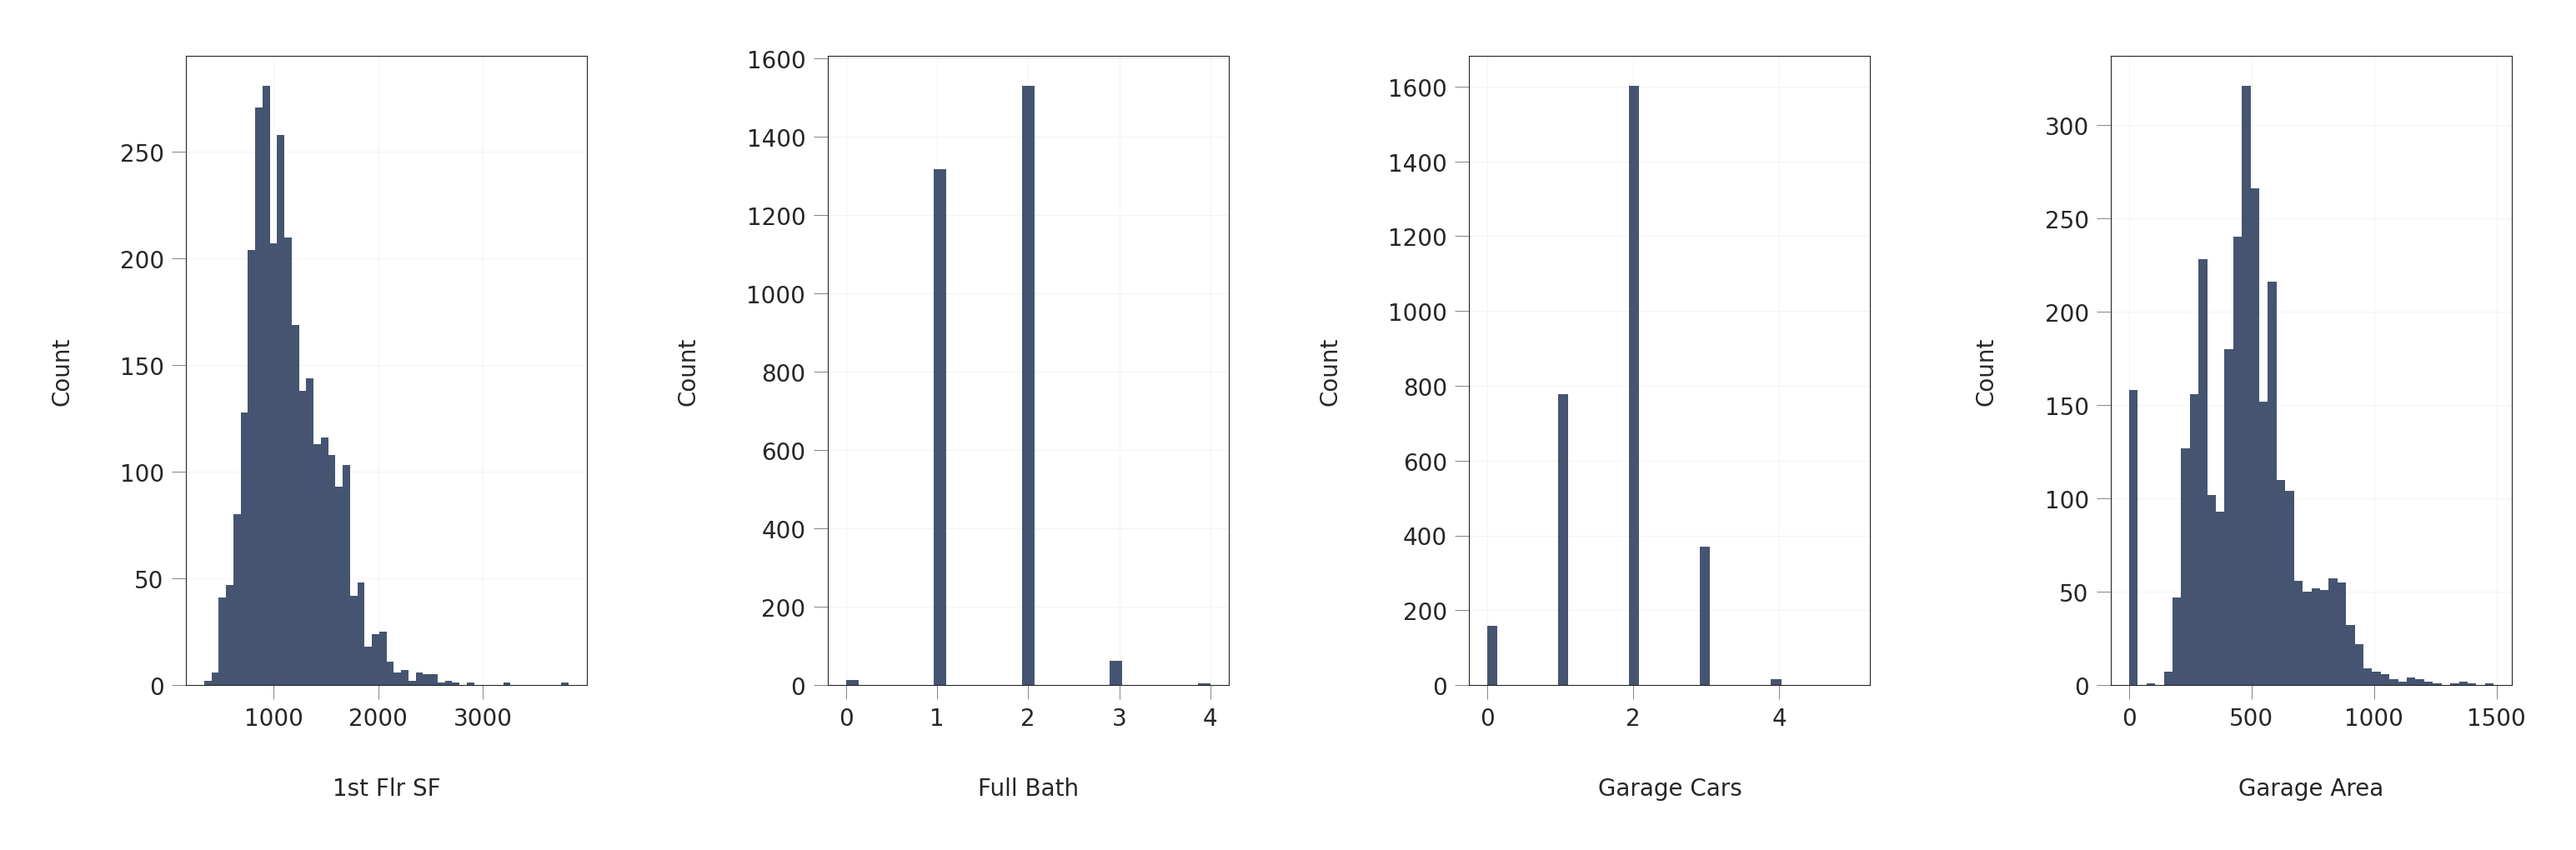

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(18,5))
fig.subplots_adjust(hspace=0.5, wspace=0.6)
for ax, v in zip(axes.flat, ["1st Flr SF", "Full Bath", 
                             "Garage Cars", "Garage Area"]):
    sns.distplot(dataset[v], kde=False, color="#172B4D", 
                 hist_kws={"alpha": 0.8}, ax=ax);
    ax.set(ylabel="Count");

their relationships with the target variable:

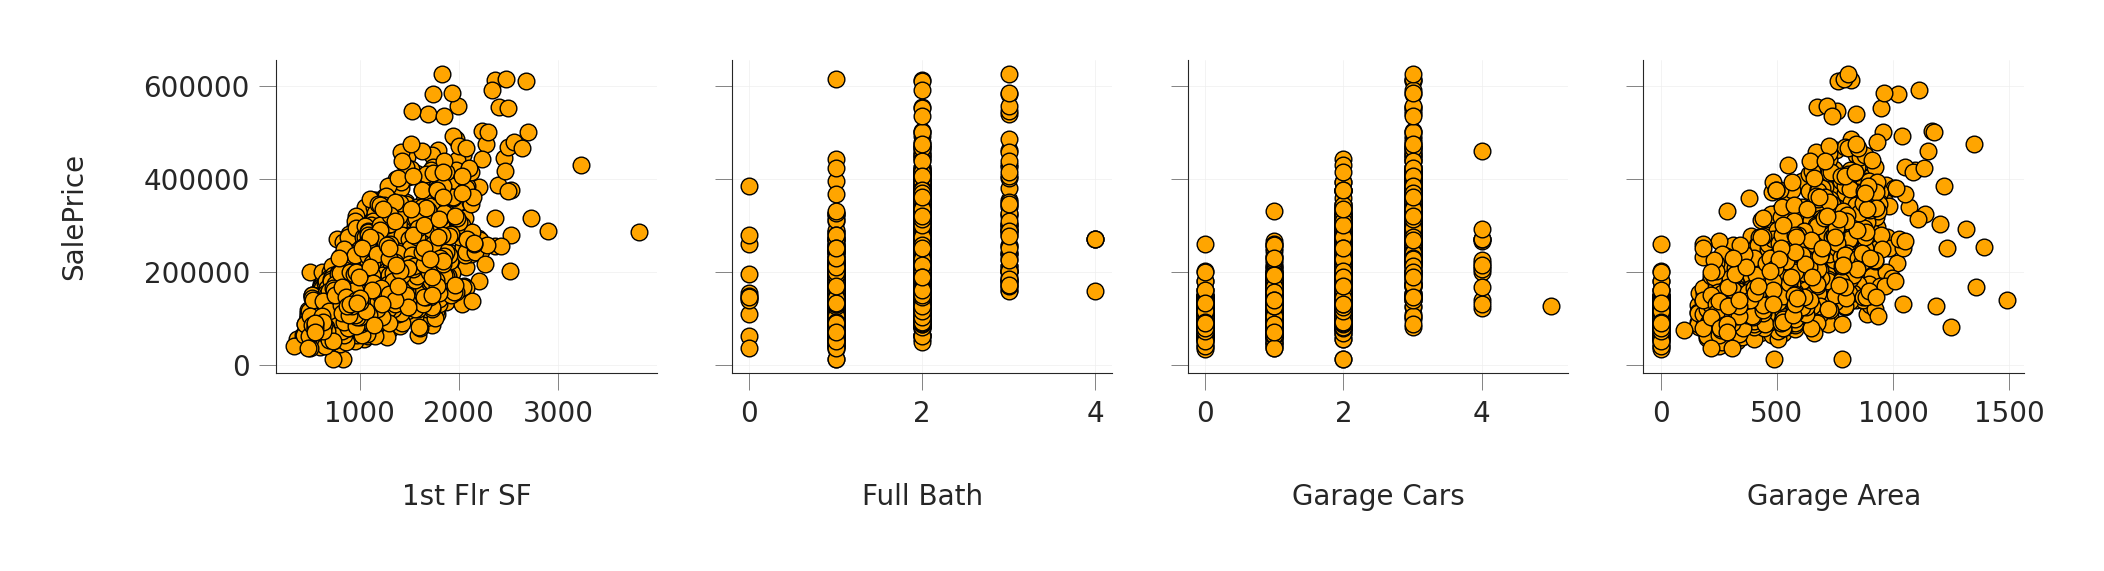

In [ ]:
x_vars = ["1st Flr SF", "Full Bath", "Garage Cars", "Garage Area"]
g = sns.PairGrid(dataset, y_vars=["SalePrice"], x_vars=x_vars);
g.map(plt.scatter, color="orange", edgecolors="#000000", linewidths=0.5);

From the plots above, these eight variables are truly positively correlated with the target variable. However, it's apparent that they are not as highly correlated as `Overall Qual` and `Gr Liv Area`.

### Relatioships Between Predictor Variables

#### Positive Correlation

Apart from the target variable, when I plotted the heatmap, I discovered a high positive correlation between `Garage Cars` and `Garage Area` and between `Gr Liv Area` and `TotRms AbvGrd`.I want to visualize these correlations also. I've already seen the distribution of each of them except for `TotRms AbvGrd`.the distribution of `TotRms AbvGrd` first:

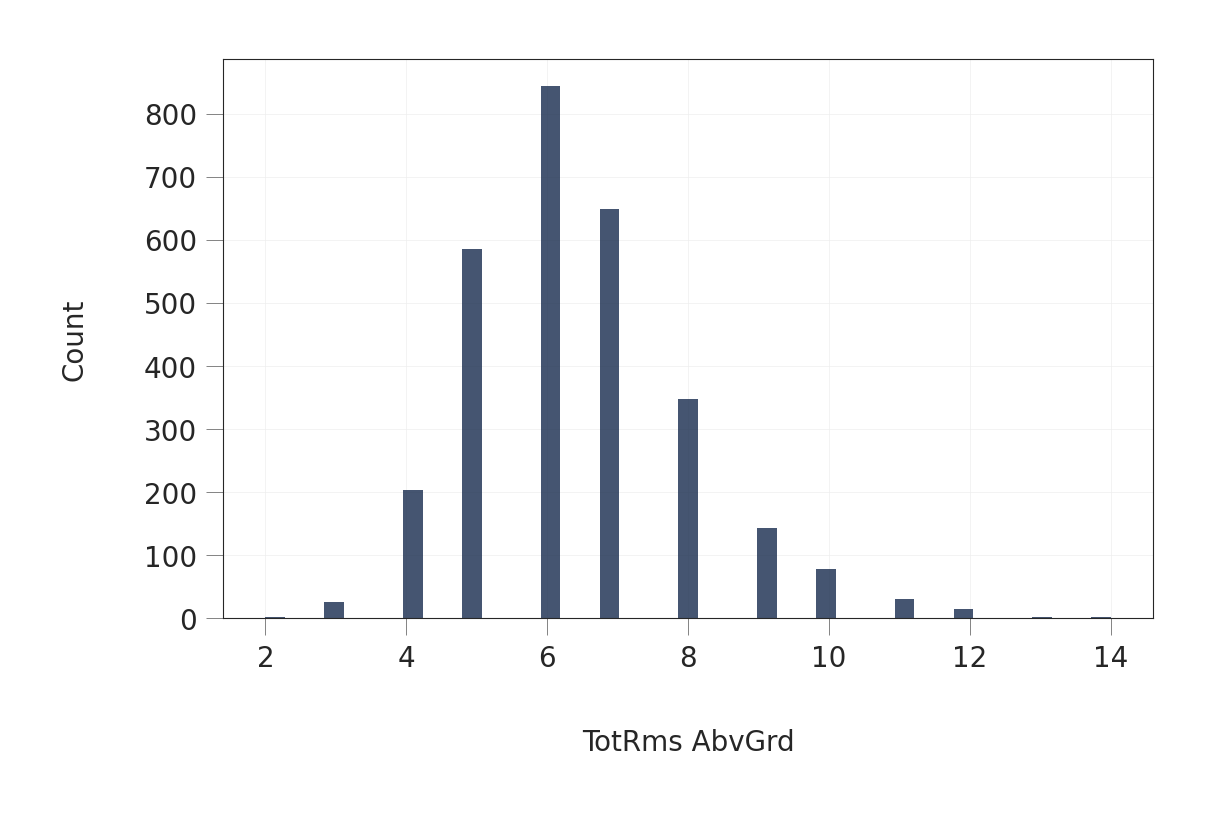

In [ ]:
sns.distplot(dataset['TotRms AbvGrd'], kde=False, 
             color="#172B4D", hist_kws={"alpha": 0.8});
plt.ylabel("Count");

visualize the relationship between `Garage Cars` and `Garage Area` and between `Gr Liv Area` and `TotRms AbvGrd`:

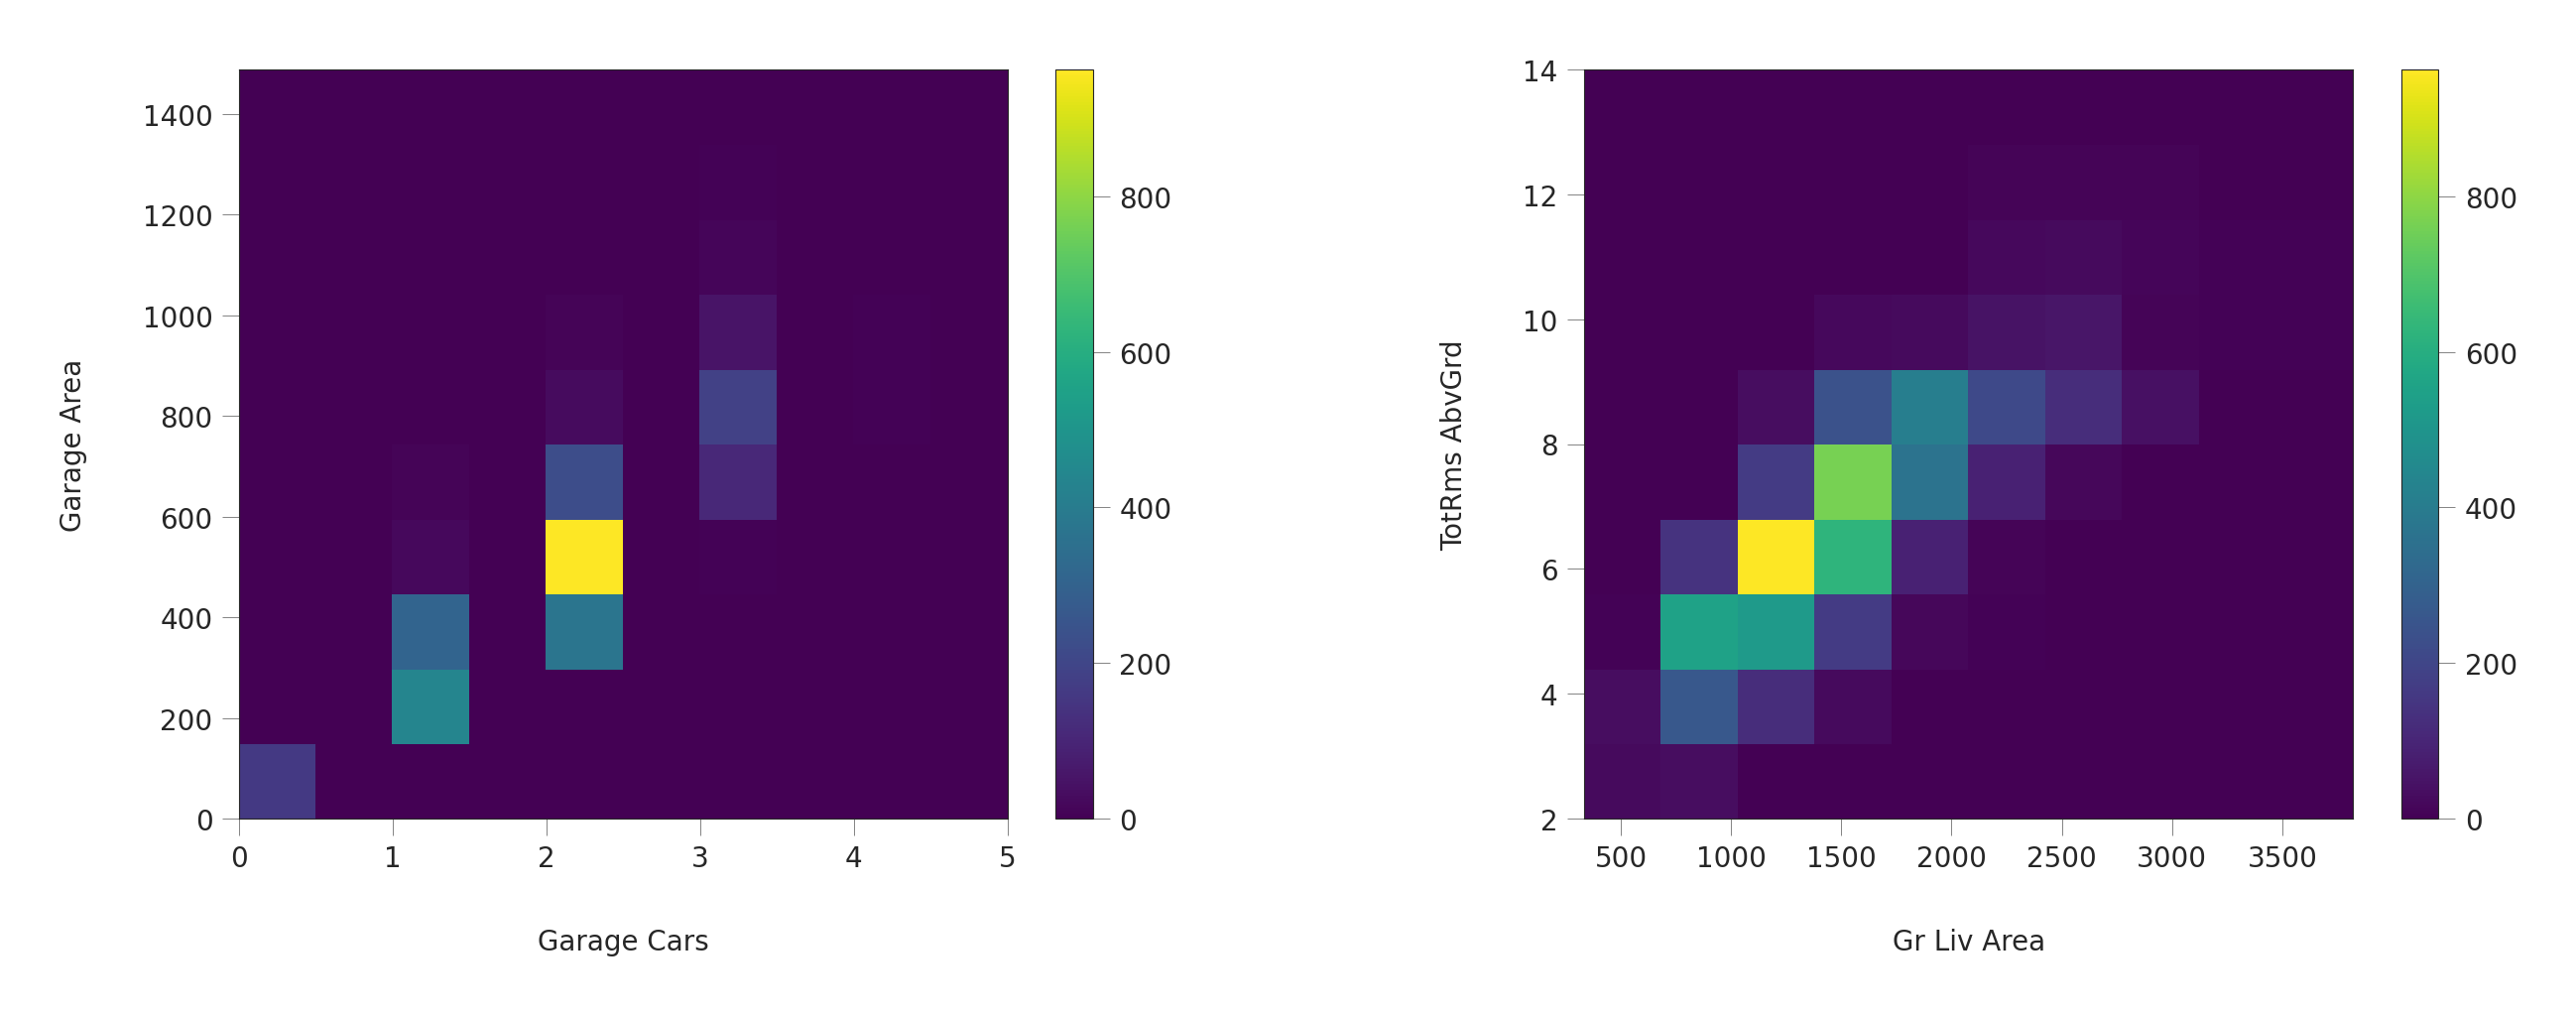

In [ ]:
plt.rc("grid", linewidth=0.05)
fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
h1 = axes[0].hist2d(dataset["Garage Cars"], 
                    dataset["Garage Area"],
                    cmap="viridis");
axes[0].set(xlabel="Garage Cars", ylabel="Garage Area")
plt.colorbar(h1[3], ax=axes[0]);
h2 = axes[1].hist2d(dataset["Gr Liv Area"], 
                    dataset["TotRms AbvGrd"],
                    cmap="viridis");
axes[1].set(xlabel="Gr Liv Area", ylabel="TotRms AbvGrd")
plt.colorbar(h1[3], ax=axes[1]);
plt.rc("grid", linewidth=0.25)

the strong correlation between each pair. For `Garage Cars` and `Garage Area`, the highest concentration of data is when `Garage Cars` is 2 and `Garage Area` is approximately between 450 and 600 SQ.FT. For `Gr Liv Area` and `TotRms AbvGrd`, the highest concentration is when `Garage Liv Area` is roughly between 800 and 2000sq.ft and `TotRms AbvGrd` is 6.

#### Negative Correlation

When I plotted the heatmap, we also discovered a significant negative correlation between `Bsmt Unf SF` and `BsmtFin SF 1`, and between `Bsmt Unf SF` and `Bsmt Full Bath`.visualize these correlations. the distribution of these variables first:

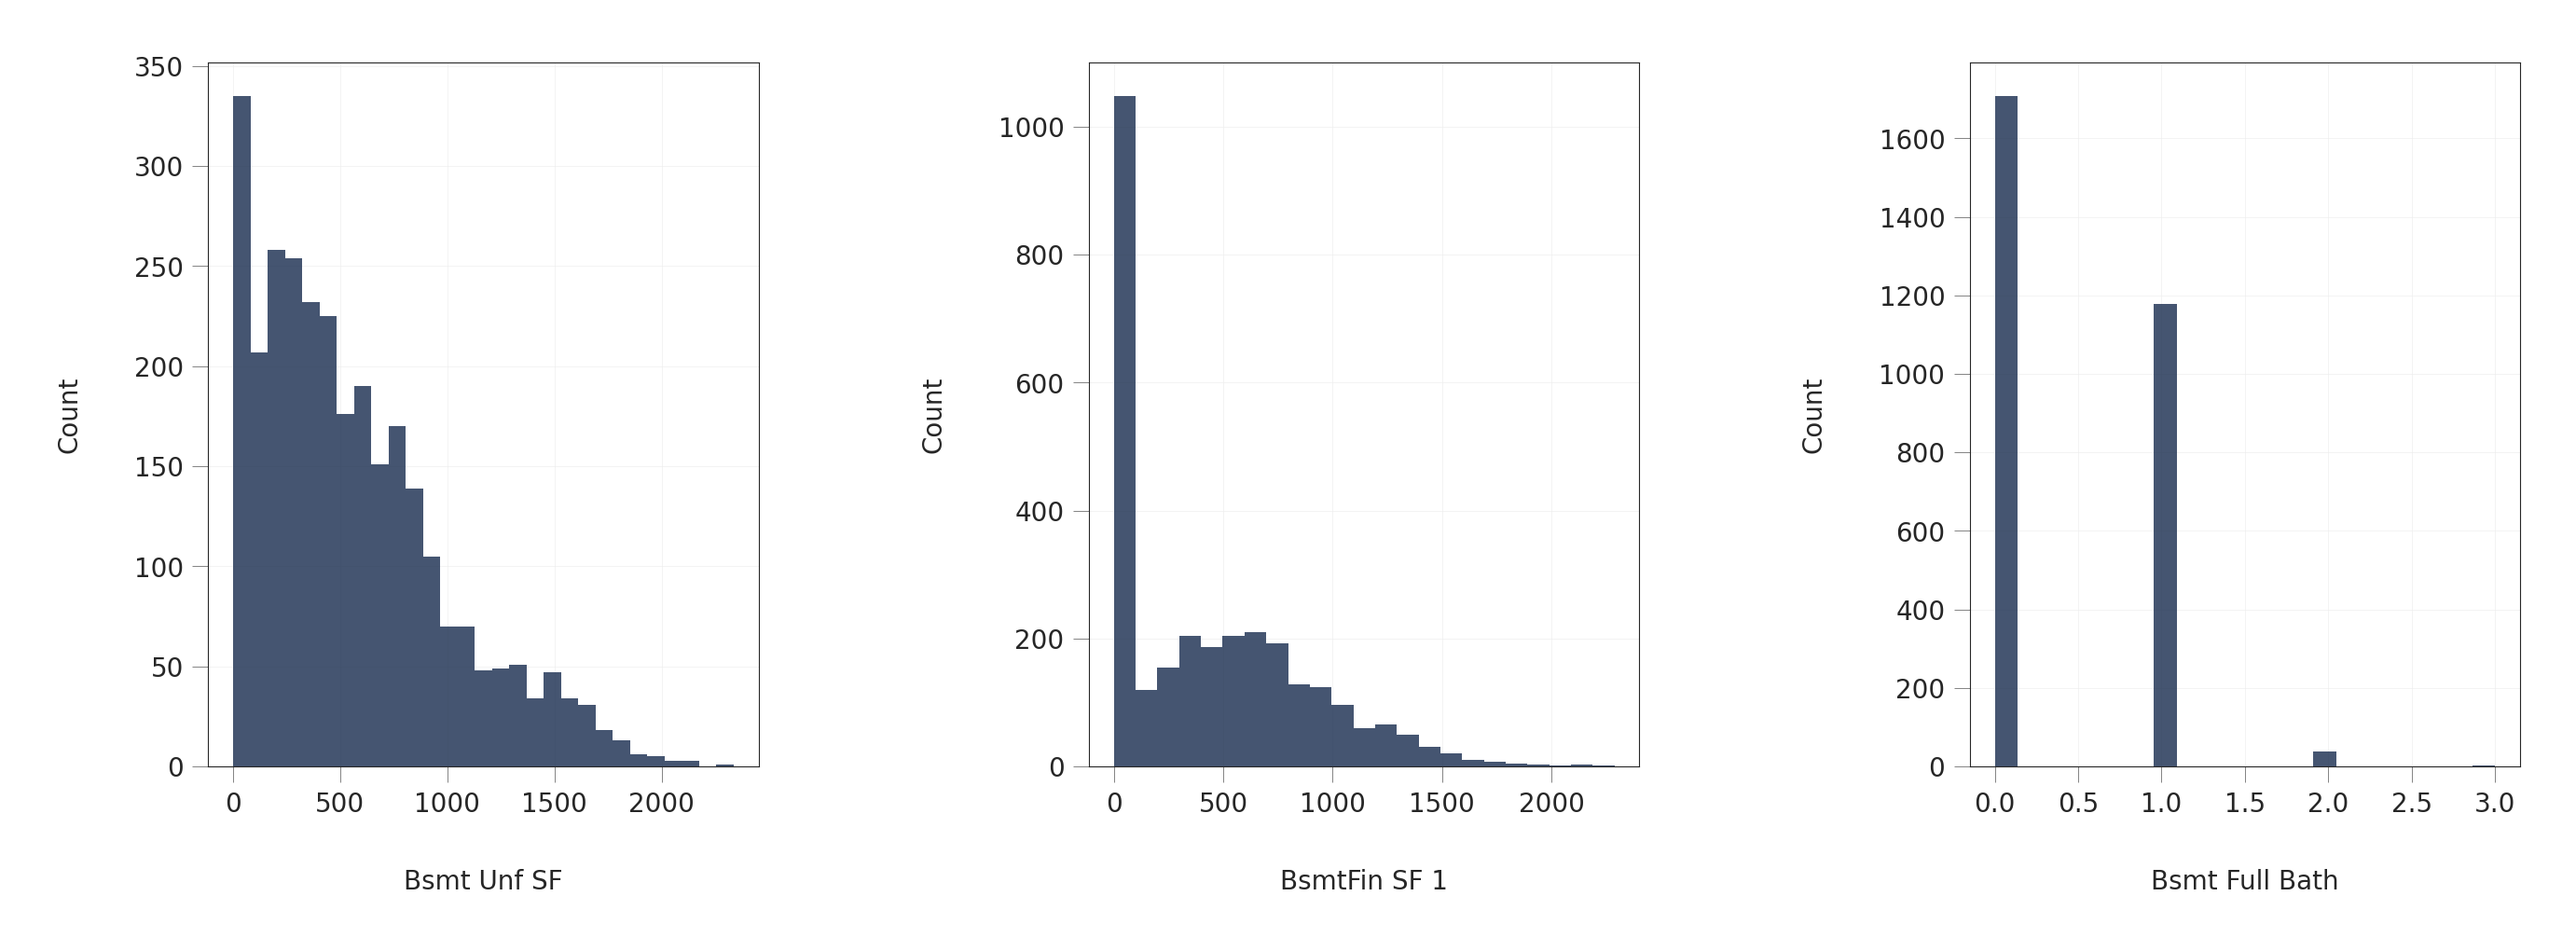

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16,5))
fig.subplots_adjust(hspace=0.5, wspace=0.6)
for ax, v in zip(axes.flat, ["Bsmt Unf SF", "BsmtFin SF 1", "Bsmt Full Bath"]):
    sns.distplot(dataset[v], kde=False, color="#172B4D", 
                 hist_kws={"alpha": 0.8}, ax=ax);
    ax.set(ylabel="Count")

visualize the relationship between each pair using scatter plots:

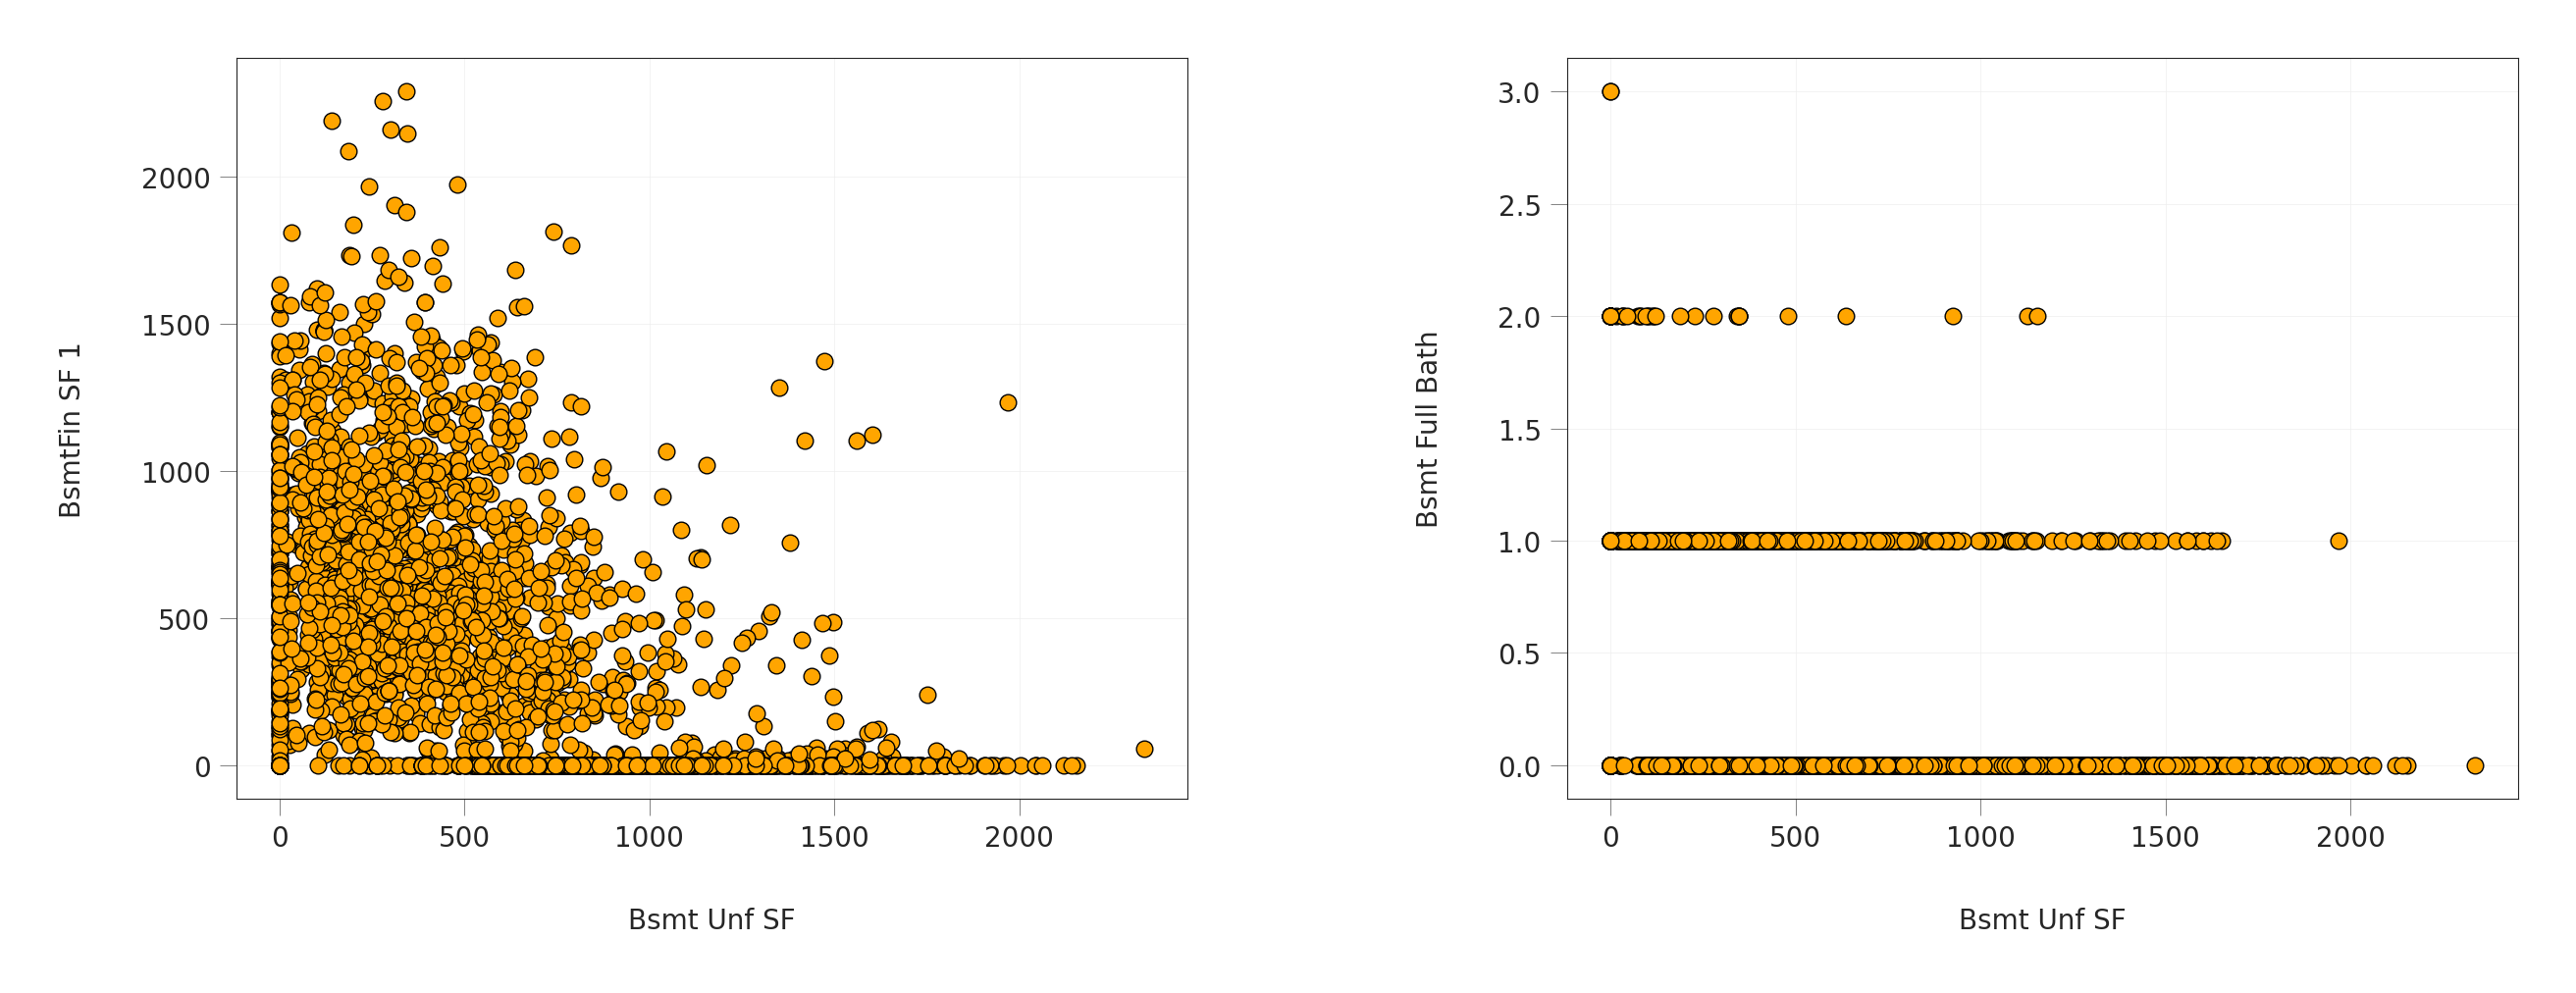

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
axes[0].scatter(dataset["Bsmt Unf SF"], dataset["BsmtFin SF 1"],
                color="orange", edgecolors="#000000", linewidths=0.5);
axes[0].set(xlabel="Bsmt Unf SF", ylabel="BsmtFin SF 1");
axes[1].scatter(dataset["Bsmt Unf SF"], dataset["Bsmt Full Bath"],
                color="orange", edgecolors="#000000", linewidths=0.5);
axes[1].set(xlabel="Bsmt Unf SF", ylabel="Bsmt Full Bath");

From the plots, the negative correlation between each pair of these variables.
 use the information I got from exploratory data analysis in this section,I will use it in feature engineering in the next section.

### Creating New Derived Features

a high positive correlation between the target variable `SalePrice` and each of `Overall Qual` and `Gr Liv Area`.the latter two features are very important in predicting the sale price. So,creating polynomial features out of these features: For each one of these features, I will derive a feature whose values are the squares of original values, and another feature whose values are the cubes of original values. Moreover, I will create a feature whose values are the product of our two features values:

In [ ]:
for f in ["Overall Qual", "Gr Liv Area"]:
    dataset[f + "_p2"] = dataset[f] ** 2
    dataset[f + "_p3"] = dataset[f] ** 3
dataset["OverallQual_GrLivArea"] = \
    dataset["Overall Qual"] * dataset["Gr Liv Area"]

there are some predictor features that are highly correlated with each other. To avoid the Multicollinearity problem, I will delete one feature from each pair of highly correlated predictors. I have two pairs: the first consists of `Garage Cars` and `Garage Area`, and the other consists of `Gr Liv Area` and `TotRms AbvGrd`. For the first pair, I will remove `Garage Cars` feature; from the second pair, I will remove `TotRms AbvGrd` feature:

In [ ]:
dataset.drop(["Garage Cars", "TotRms AbvGrd"], axis=1, inplace=True)

### Dealing with Ordinal Variables

There are some ordinal features in our dataset. For example, the `Bsmt Cond` feature has the following possible values: 

In [ ]:
print("Unique values in 'Bsmt Cond' column:")
print(dataset['Bsmt Cond'].unique().tolist())

Unique values in 'Bsmt Cond' column:
['Gd', 'TA', 'No Basement', 'Po', 'Fa', 'Ex']


Where "Gd" means "Good", "TA" means "Typical", "Po" means "Poor", "Fa" means "Fair", and "Ex" means "Excellent" according to the dataset documentation. But the problem is that machine learning models will not know that this feature represents a ranking; it will be treated as other categorical features. So to solve this issue, I will map each one of the possible values of this feature to a number. We will map `"No Basement"` to 0, `"Po"` to 1, `"Fa"` to 2, `"TA"` to 3, `"Gd"` to 4, and `"Ex"` to 5.

The ordinal features in the dataset are: `Exter Qual`, `Exter Cond`, `Bsmt Qual`, `Bsmt Cond`, `Bsmt Exposure`, `BsmtFin Type 1`, `BsmtFin Type 2`, `Heating QC`, `Central Air`, `Kitchen Qual`, `Functional`, `Fireplace Qu`, `GarageFinish`, `Garage Qual`, `Garage Cond`, `Pool QC`, `Land Slope` and `Fence`. I will map the values of each of them to corresponding numbers as described for `Bsmt Cond` above and in accordance with the dataset documentation:

In [ ]:
mp = {'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0}
dataset['Exter Qual'] = dataset['Exter Qual'].map(mp)
dataset['Exter Cond'] = dataset['Exter Cond'].map(mp)
dataset['Heating QC'] = dataset['Heating QC'].map(mp)
dataset['Kitchen Qual'] = dataset['Kitchen Qual'].map(mp)

mp = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Basement':0}
dataset['Bsmt Qual'] = dataset['Bsmt Qual'].map(mp)
dataset['Bsmt Cond'] = dataset['Bsmt Cond'].map(mp)
dataset['Bsmt Exposure'] = dataset['Bsmt Exposure'].map(
    {'Gd':4,'Av':3,'Mn':2,'No':1,'No Basement':0})

mp = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No Basement':0}
dataset['BsmtFin Type 1'] = dataset['BsmtFin Type 1'].map(mp)
dataset['BsmtFin Type 2'] = dataset['BsmtFin Type 2'].map(mp)

dataset['Central Air'] = dataset['Central Air'].map({'Y':1,'N':0})
dataset['Functional'] = dataset['Functional'].map(
    {'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,
     'Maj2':2,'Sev':1,'Sal':0})
dataset['Fireplace Qu'] = dataset['Fireplace Qu'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Fireplace':0})
dataset['Garage Finish'] = dataset['Garage Finish'].map(
    {'Fin':3,'RFn':2,'Unf':1,'No Garage':0})
dataset['Garage Qual'] = dataset['Garage Qual'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0})
dataset['Garage Cond'] = dataset['Garage Cond'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0})
dataset['Pool QC'] = dataset['Pool QC'].map(
    {'Ex':4,'Gd':3,'TA':2,'Fa':1,'No Pool':0})
dataset['Land Slope'] = dataset['Land Slope'].map(
    {'Sev': 2, 'Mod': 1, 'Gtl': 0})
dataset['Fence'] = dataset['Fence'].map(
    {'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'No Fence':0})

### One-Hot Encoding For Categorical Features

 the variable `Paved Drive` which indicates how the driveway is paved. It has three possible values: `Y` which means for "Paved", `P` which means "Partial Pavement", and `N` which means "Dirt/Gravel". Let us take a look at `Paved Drive` value for the first few rows in dataset:

In [ ]:
dataset[['Paved Drive']].head()

,Paved Drive
0,P
1,Y
2,Y
3,Y
4,Y


performing one-hot encoding:

In [ ]:
dataset = pd.get_dummies(dataset)

In [ ]:
pavedDrive_oneHot = [c for c in dataset.columns if c.startswith("Paved")]
dataset[pavedDrive_oneHot].head()

,Paved Drive_N,Paved Drive_P,Paved Drive_Y
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


We can see for example that a value of `P` in the original `Paved Drive` column is converted to 1 in `Paved Drive_P` and zeros in `Paved Drive_N` and `Paved Drive_Y` after one-hot encoding.

All categorical column are converted in the same way.


<h1 id="pred-type">Prediction Type and Modeling Techniques</h1>
 In this project, I want to predict the *price* of a house given information about it. The price I want to predict is a continuous value; it can be any real number. This can be seen by looking at the target vatiable in our dataset `SalePrice`:

In [ ]:
dataset[['SalePrice']].head()

,SalePrice
0,215000
1,105000
2,172000
3,244000
4,189900


That means that the prediction type that is appropriate to our problem is **regression**.

<h1 id="model-building">Model Building and Evaluation</h1>

## Feature Scaling

In order to make all algorithms work properly with our data, I need to scale the features in our dataset. For that,I will use a helpful function named `StandardScaler()` from the popular Scikit-Learn Python package. This function standardizes features by subtracting the mean and scaling to unit variance. It works on each feature independently. For a value $x$ of some feature $F$, the `StandardScaler()` function performs the following operation:

\begin{equation*}
z = \frac{x - \mu}{s}
\end{equation*}

where $z$ is the result of scaling $x$, $\mu$ is the mean of feature $F$, and $s$ is the standard deviation of $F$. 

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# We need to fit the scaler to our data before transformation
dataset.loc[:, dataset.columns != 'SalePrice'] = scaler.fit_transform(
    dataset.loc[:, dataset.columns != 'SalePrice'])

In [ ]:
dataset.head()

,MS SubClass,Lot Frontage,Lot Area,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,-0.88,2.53,2.78,-0.22,-0.06,-0.51,-0.37,-1.16,0.07,-0.69,...,-0.30,-0.05,-0.02,0.39,-0.26,-0.06,-0.09,-0.13,0.46,-0.30
1,-0.88,0.68,0.20,-0.22,-0.78,0.39,-0.34,-1.11,-0.57,-0.69,...,-0.30,-0.05,-0.02,0.39,-0.26,-0.06,-0.09,-0.13,0.46,-0.30
2,-0.88,0.71,0.54,-0.22,-0.06,0.39,-0.44,-1.26,0.05,-0.69,...,-0.30,-0.05,-0.02,0.39,-0.26,-0.06,-0.09,-0.13,0.46,-0.30
3,-0.88,1.07,0.14,-0.22,0.65,-0.51,-0.11,-0.78,-0.57,1.05,...,-0.30,-0.05,-0.02,0.39,-0.26,-0.06,-0.09,-0.13,0.46,-0.30
4,0.06,0.50,0.48,-0.22,-0.78,-0.51,0.85,0.66,-0.57,-0.69,...,-0.30,-0.05,-0.02,0.39,-0.26,-0.06,-0.09,-0.13,0.46,-0.30


## Splitting the Dataset



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop('SalePrice', axis=1), dataset[['SalePrice']], 
    test_size=0.25, random_state=3)

#### 1. Ridge Regression

This model has the following syntax:

```py
Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, 
      max_iter=None, tol=0.001, solver=’auto’, random_state=None)
```

Firstly, I will use `GridSearchCV()` to search for the best model parameters in a parameter space provided by us. 
The parameter `alpha` represents the regularization strength, `fit_intercept` determines whether to calculate the intercept for this model, and `solver` controls which solver to use in the computational routines.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

parameter_space = {
    "alpha": [1, 10, 100, 290, 500],
    "fit_intercept": [True, False],
    "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
}

clf = GridSearchCV(Ridge(random_state=3), parameter_space, n_jobs=4,
                   cv=3, scoring="neg_mean_absolute_error")

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'alpha': 290, 'fit_intercept': True, 'solver': 'svd'}


I defined the parameter space above using reasonable values for chosen parameters. Then we used `GridSearchCV()` with 3 folds (`cv=3`). Now Ridge model with the best parameters found:

In [ ]:
ridge_model = Ridge(random_state=3, **clf.best_params_)

In [ ]:
ridge_model.fit(X_train, y_train);

Finally, we test our model on `X_test`. Then we evaluate the model performance by comparing its predictions with the actual true values in `y_test` using the MAE metric as we described above:

In [ ]:
from sklearn.metrics import mean_absolute_error

y_pred = ridge_model.predict(X_test)
ridge_mae = mean_absolute_error(y_test, y_pred)
print("Ridge MAE =", ridge_mae)

Ridge MAE = 15270.463549642716


#### 2. Elastic Net

This model has the following syntax:

```py
ElasticNet(alpha=1.0, l1_ratio=0.5, fit_intercept=True, normalize=False, 
           precompute=False, max_iter=1000, copy_X=True, tol=0.0001, 
           warm_start=False, positive=False, random_state=None, selection=’cyclic’)
```

Firstly, we will use `GridSearchCV()` to search for the best model parameters in a parameter space provided by us. The parameter `alpha` is a constant that multiplies the penalty terms, `l1_ratio` determines the amount of L1 and L2 regularizations, `fit_intercept` is the same as Ridge's.

In [ ]:
from sklearn.linear_model import ElasticNet

parameter_space = {
    "alpha": [1, 10, 100, 280, 500],
    "l1_ratio": [0.5, 1],
    "fit_intercept": [True, False],
}

clf = GridSearchCV(ElasticNet(random_state=3), parameter_space, 
                   n_jobs=4, cv=3, scoring="neg_mean_absolute_error")

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'alpha': 280, 'fit_intercept': True, 'l1_ratio': 1}


We defined the parameter space above using reasonable values for chosen parameters. Then we used `GridSearchCV()` with 3 folds (`cv=3`). Now we build our Ridge model with the best parameters found:

In [ ]:
elasticNet_model = ElasticNet(random_state=3, **clf.best_params_)

Then we train our model using our training set (`X_train` and `y_train`):

In [ ]:
elasticNet_model.fit(X_train, y_train);

Finally, we test our model on `X_test`. Then we evaluate the model performance by comparing its predictions with the actual true values in `y_test` using the MAE metric as we described above:

In [ ]:
y_pred = elasticNet_model.predict(X_test)
elasticNet_mae = mean_absolute_error(y_test, y_pred)
print("Elastic Net MAE =", elasticNet_mae)

Elastic Net MAE = 14767.90981933659


### Nearest Neighbors

For Nearest Neighbors, we will use an implementation of the k-nearest neighbors (KNN) algorithm provided by Scikit-Learn package.

The KNN model has the following syntax:

```py
KNeighborsRegressor(n_neighbors=5, weights=’uniform’, algorithm=’auto’, 
                    leaf_size=30, p=2, metric=’minkowski’, metric_params=None, 
                    n_jobs=None, **kwargs)
```

Firstly, we will use `GridSearchCV()` to search for the best model parameters in a parameter space provided by us. The parameter `n_neighbors` represents `k` which is the number of neighbors to use, `weights` determines the weight function used in prediction: `uniform` or `distance`, `algorithm` specifies the algorithm used to compute the nearest neighbors, `leaf_size` is passed to `BallTree` or `KDTree` algorithm. It can affect the speed of the construction and query, as well as the memory required to store the tree.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

parameter_space = {
    "n_neighbors": [9, 10, 11,50],
    "weights": ["uniform", "distance"],
    "algorithm": ["ball_tree", "kd_tree", "brute"],
    "leaf_size": [1,2,20,50,200]
}

clf = GridSearchCV(KNeighborsRegressor(), parameter_space, cv=3, 
                   scoring="neg_mean_absolute_error", n_jobs=4)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 10, 'weights': 'distance'}


We defined the parameter space above using reasonable values for chosen parameters. Then we used `GridSearchCV()` with 3 folds (`cv=3`). Now we build our Ridge model with the best parameters found:

In [ ]:
knn_model = KNeighborsRegressor(**clf.best_params_)

Then we train our model using our training set (`X_train` and `y_train`):

In [ ]:
knn_model.fit(X_train, y_train);

Finally, we test our model on `X_test`. Then we evaluate the model performance by comparing its predictions with the actual true values in `y_test` using the MAE metric as we described above:

In [ ]:
y_pred = knn_model.predict(X_test)
knn_mae = mean_absolute_error(y_test, y_pred)
print("K-Nearest Neighbors MAE =", knn_mae)

K-Nearest Neighbors MAE = 22780.14347886256


### Support Vector Regression

For Support Vector Regression (SVR), we will use one of three implementations provided by the Scikit-Learn package.

The SVR model has the following syntax:

```py
SVR(kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, tol=0.001, 
    C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
```

Firstly, we will use `GridSearchCV()` to search for the best model parameters in a parameter space provided by us. The parameter `kernel` specifies the kernel type to be used in the algorithm, `degree` represents the degree of the polynomial kernel `poly`, `gamma` is the kernel coefficient for `rbf`, `poly` and `sigmoid` kernels, `coef0` is independent term in kernel function, and `C` is the penalty parameter of the error term.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR

parameter_space = \
    {
        "kernel": ["poly", "linear", "rbf", "sigmoid"],
        "degree": [3, 5],
        "coef0": [0, 3, 7],
        "gamma":[1e-3, 1e-1, 1/X_train.shape[1]],
        "C": [1, 10, 100],
    }

clf = GridSearchCV(SVR(), parameter_space, cv=3, n_jobs=4,
                   scoring="neg_mean_absolute_error")

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'C': 100, 'coef0': 3, 'degree': 5, 'gamma': 0.004132231404958678, 'kernel': 'poly'}


We defined the parameter space above using reasonable values for chosen parameters. Then we used `GridSearchCV()` with 3 folds (`cv=3`). Now we build our Support Vector Regression model with the best parameters found:

In [ ]:
svr_model = SVR(**clf.best_params_)

Then we train our model using our training set (`X_train` and `y_train`):

In [ ]:
svr_model.fit(X_train, y_train);

Finally, we test our model on `X_test`. Then we evaluate the model performance by comparing its predictions with the actual true values in `y_test` using the MAE metric as we described above:

In [ ]:
y_pred = svr_model.predict(X_test)
svr_mae = mean_absolute_error(y_test, y_pred)
print("Support Vector Regression MAE =", svr_mae)

Support Vector Regression MAE = 12874.927869261619


### Decision Tree

For Decision Tree (DT), we will use an implementations provided by the Scikit-Learn package.

The Decision Tree model has the following syntax:

```py
DecisionTreeRegressor(criterion=’mse’, splitter=’best’, max_depth=None, 
                      min_samples_split=2, min_samples_leaf=1, 
                      min_weight_fraction_leaf=0.0, max_features=None, 
                      random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                      min_impurity_split=None, presort=False)
```

Firstly, we will use `GridSearchCV()` to search for the best model parameters in a parameter space provided by us. The parameter `criterion` specifies the function used to measure the quality of a split, `min_samples_split` determines the minimum number of samples required to split an internal node, `min_samples_leaf` determines the minimum number of samples required to be at a leaf node, and `max_features` controls the number of features to consider when looking for the best split.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

parameter_space = \
    {
        "criterion": ["mse", "friedman_mse", "mae"],
        "min_samples_split": [5, 18, 29, 50],
        "min_samples_leaf": [3, 7, 15, 25],
        "max_features": [20, 50, 150, 200, X_train.shape[1]],
    }

clf = GridSearchCV(DecisionTreeRegressor(random_state=3), parameter_space, 
                   cv=3, scoring="neg_mean_absolute_error", n_jobs=4)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'criterion': 'mse', 'max_features': 242, 'min_samples_leaf': 7, 'min_samples_split': 18}


We defined the parameter space above using reasonable values for chosen parameters. Then we used `GridSearchCV()` with 3 folds (`cv=3`). Now we build our Decision Tree model with the best parameters found:

In [ ]:
dt_model = DecisionTreeRegressor(**clf.best_params_)

Then we train our model using our training set (`X_train` and `y_train`):

In [ ]:
dt_model.fit(X_train, y_train);

Finally, we test our model on `X_test`. Then we evaluate the model performance by comparing its predictions with the actual true values in `y_test` using the MAE metric as we described above:

In [ ]:
y_pred = dt_model.predict(X_test)
dt_mae = mean_absolute_error(y_test, y_pred)
print("Decision Tree MAE =", dt_mae)

Decision Tree MAE = 20873.949425979506


### Random Forest

For Random Forest (RF), we will use an implementations provided by the Scikit-Learn package.

The Random Forest model has the following syntax:

```py
RandomForestRegressor(n_estimators=’warn’, criterion=’mse’, max_depth=None, 
                      min_samples_split=2, min_samples_leaf=1, 
                      min_weight_fraction_leaf=0.0, max_features=’auto’, 
                      max_leaf_nodes=None, min_impurity_decrease=0.0, 
                      min_impurity_split=None, bootstrap=True, oob_score=False, 
                      n_jobs=None, random_state=None, verbose=0, warm_start=False)
```

Firstly, we will use `GridSearchCV()` to search for the best model parameters in a parameter space provided by us. The parameter `n_estimators` specifies the number of trees in the forest, `bootstrap` determines whether bootstrap samples are used when building trees. `criterion`, `max_depth`, `min_samples_split`, `min_samples_leaf`, `max_features` are the same as those of the decision tree model.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

parameter_space = \
    {
        "n_estimators": [10, 100, 300, 600],
        "criterion": ["mse", "mae"],
        "max_depth": [7, 50, 254],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 5],
        "max_features": [19, 100, X_train.shape[1]],
        "bootstrap": [True, False],
    }

clf = RandomizedSearchCV(RandomForestRegressor(random_state=3), 
                         parameter_space, cv=3, n_jobs=4,
                         scoring="neg_mean_absolute_error", 
                         n_iter=10, random_state=3)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 19, 'max_depth': 254, 'criterion': 'mse', 'bootstrap': False}


We defined the parameter space above using reasonable values for chosen parameters. Then we used `GridSearchCV()` with 3 folds (`cv=3`). Now we build our Random Forest model with the best parameters found:

In [ ]:
rf_model = RandomForestRegressor(**clf.best_params_)

Then we train our model using our training set (`X_train` and `y_train`):

In [ ]:
rf_model.fit(X_train, y_train);

Finally, we test our model on `X_test`. Then we evaluate the model performance by comparing its predictions with the actual true values in `y_test` using the MAE metric as we described above:

In [ ]:
y_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, y_pred)
print("Random Forest MAE =", rf_mae)

Random Forest MAE = 14446.71639344262


### Gradient Boosting

For Gradient Boosting (GB), we will use the renowned XGBoost implementations.

XGBoost model has the following syntax:

```py
XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
             objective='reg:linear', booster='gbtree', n_jobs=1, nthread=None, 
             gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, 
             colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
             scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, 
             missing=None, importance_type='gain', **kwargs)
```

Firstly, we will use `GridSearchCV()` to search for the best model parameters in a parameter space provided by us. The parameter `max_depth` sets the maximum depth of a tree, `learning_rate` represents the step size shrinkage used in updating weights, `n_estimators` specifies the number of boosted trees to fit, `booster` determines which booster to use, `gamma` specifies the minimum loss reduction required to make a further partition on a leaf node of the tree, `subsample` is subsample ratio of the training instances; this subsampling will occur once in every boosting iteration, `colsample_bytree` specifies the subsample ratio of columns when constructing each tree, `colsample_bylevel` specifies the subsample ratio of columns for each split, in each level, `reg_alpha` is L1 regularization term, and `reg_lambda` is L2 regularization term.

In [ ]:
from xgboost import XGBRegressor

parameter_space = \
    {
        "max_depth": [4, 5, 6],
        "learning_rate": [0.005, 0.009, 0.01],
        "n_estimators": [700, 1000, 2500],
        "booster": ["gbtree",],
        "gamma": [7, 25, 100],
        "subsample": [0.3, 0.6],
        "colsample_bytree": [0.5, 0.7],
        "colsample_bylevel": [0.5, 0.7,],
        "reg_alpha": [1, 10, 33],
        "reg_lambda": [1, 3, 10],
    }

clf = RandomizedSearchCV(XGBRegressor(random_state=3), 
                         parameter_space, cv=3, n_jobs=4,
                         scoring="neg_mean_absolute_error", 
                         random_state=3, n_iter=10)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

[12:54:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best parameters:
{'subsample': 0.3, 'reg_lambda': 3, 'reg_alpha': 33, 'n_estimators': 2500, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 25, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.5, 'booster': 'gbtree'}


We defined the parameter space above using reasonable values for chosen parameters. Then we used `GridSearchCV()` with 3 folds (`cv=3`). Now we build our XGBoost model with the best parameters found:

In [ ]:
xgb_model = XGBRegressor(**clf.best_params_)

Then we train our model using our training set (`X_train` and `y_train`):

In [ ]:
xgb_model.fit(X_train, y_train);

[12:54:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Finally, we test our model on `X_test`. Then we evaluate the model performance by comparing its predictions with the actual true values in `y_test` using the MAE metric as we described above:

In [ ]:
y_pred = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, y_pred)
print("XGBoost MAE =", xgb_mae)

XGBoost MAE = 12541.290583376025


<h1 id="analysis-comparison">Analysis and Comparison</h1>

In the previous section, we created many models: for each model, we searched for good parameters then we constructed the model using those parameters, then trained (fitted) the model to our training data (`X_train` and `y_train`), then tested the model on our test data (`X_test`) and finally, we evaluated the model performance by comparing the model predictions with the true values in `y_test`. We used the mean absolute error (MAE) to evaluate model performance. 

Using the results we got in the previous section, we present a table that shows the mean absolute error (MAE) for each model when applied to the test set `X_test`. The table is sorted ascendingly according to MAE score.

|Model                            |MAE      |
|---------------------------------|---------|
|XGBoost                          |12556.68 |
|Support Vector Regression (SVR)  |12874.93 |
|Random Forest                    |14506.46 |
|Elastic Net                      |14767.91 |
|Ridge                            |15270.46 |
|Decision Tree                    |20873.95 |
|K-Nearest Neighbors (KNN)        |22780.14 |

We also present a graph that visualizes the table contents:

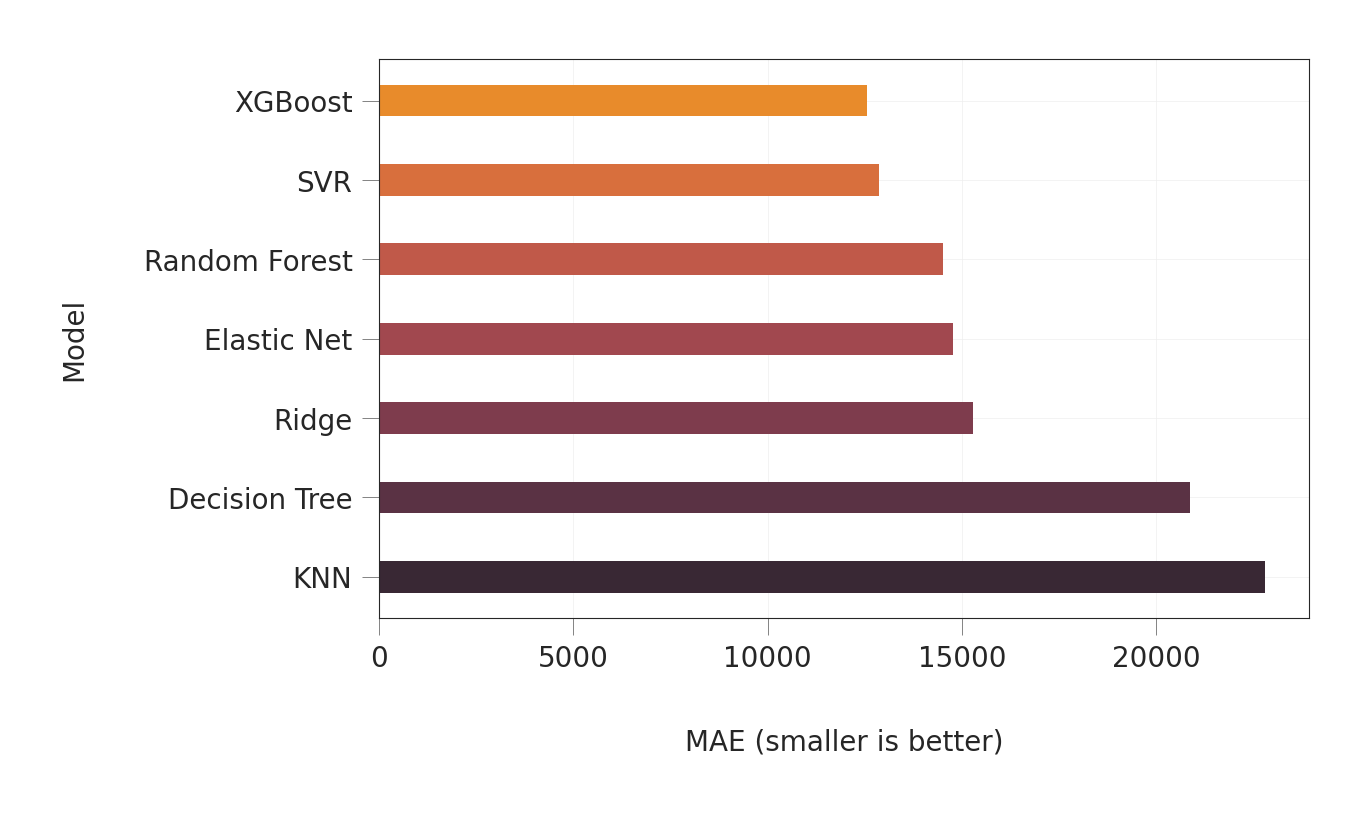

In [ ]:
x = ['KNN', 'Decision Tree', 'Ridge', 
     'Elastic Net', 'Random Forest', 'SVR', 'XGBoost']
y = [22780.14, 20873.9, 15270.46, 14767.91,
     14506.46, 12874.93, 12556.68]
colors = ["#392834", "#5a3244", "#7e3c4d", "#a1484f", 
          "#c05949", "#d86f3d", "#e88b2b", "#edab06"]
fig, ax = plt.subplots()
plt.barh(y=range(len(x)), tick_label=x, width=y, height=0.4, color=colors);
ax.set(xlabel="MAE (smaller is better)", ylabel="Model");

By looking at the table and the graph, we can see that XGBoost model has the smallest MAE, `12556.68` followed by Support Vector Regression model with a little larger error of `12974.93`. After that, Random Forest and Elastic Net models come with similar errors: `14506.46` and `14767.91` respectively. Then come Ridge with close errors: `15270.46` respectively. Then comes Decision Tree model with MAE of `20873.95`, and at last, the K-Nearest Neighbors model with an error of `22780.14`.

So, in our experiment, the best model is XGBoost and the worst model is K-Nearest Neighbors. We can see that the difference in MAE between the best model and the worst model is significant; the best model has almost half of the error of the worst model.

## Performance Interpretation

We chose the mean absolute error (MAE) as our performance metric to evaluate and compare models. MAE presents a value that is easy to understand; it shows the average value of model error. For example, for our XGBoost model, its MAE is `12556.68` which means that on average, XGBoost will predict a value that is bigger or smaller than the true value by `12556.68`. Now to understand how good this MAE is, we need to know the range and distribution of the data. In our case, we need to see the values of the target variable `SalePrice` which contains the actual house prices. Let's see the violin plot, box plot, and histogram of `SalePrice` in our dataset:

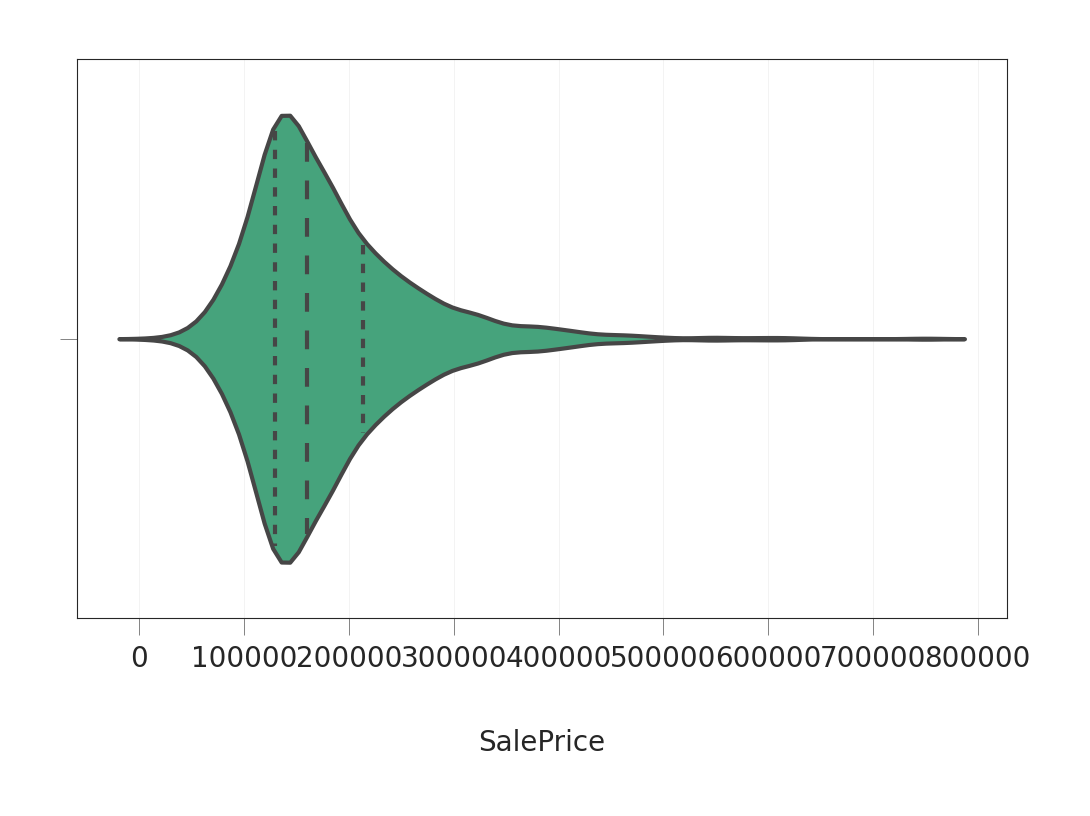

In [ ]:
sns.violinplot(x=dataset['SalePrice'], inner="quartile", color="#36B37E");

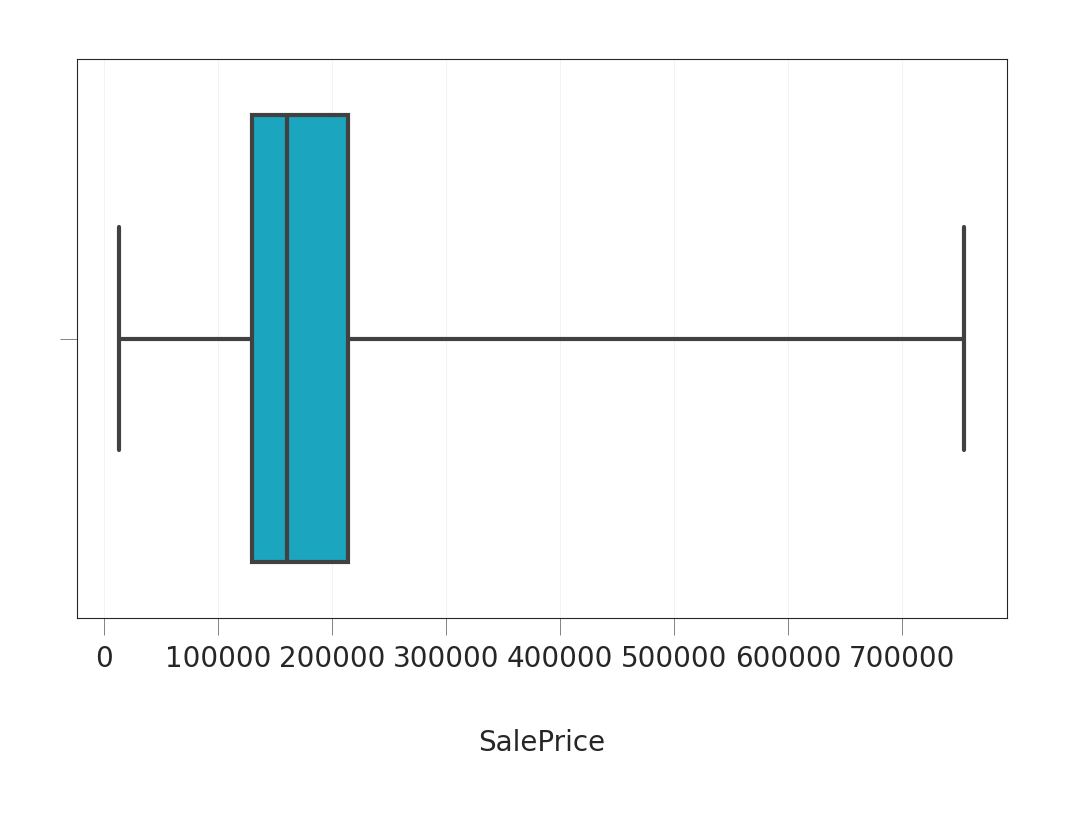

In [ ]:
sns.boxplot(dataset['SalePrice'], whis=10, color="#00B8D9");

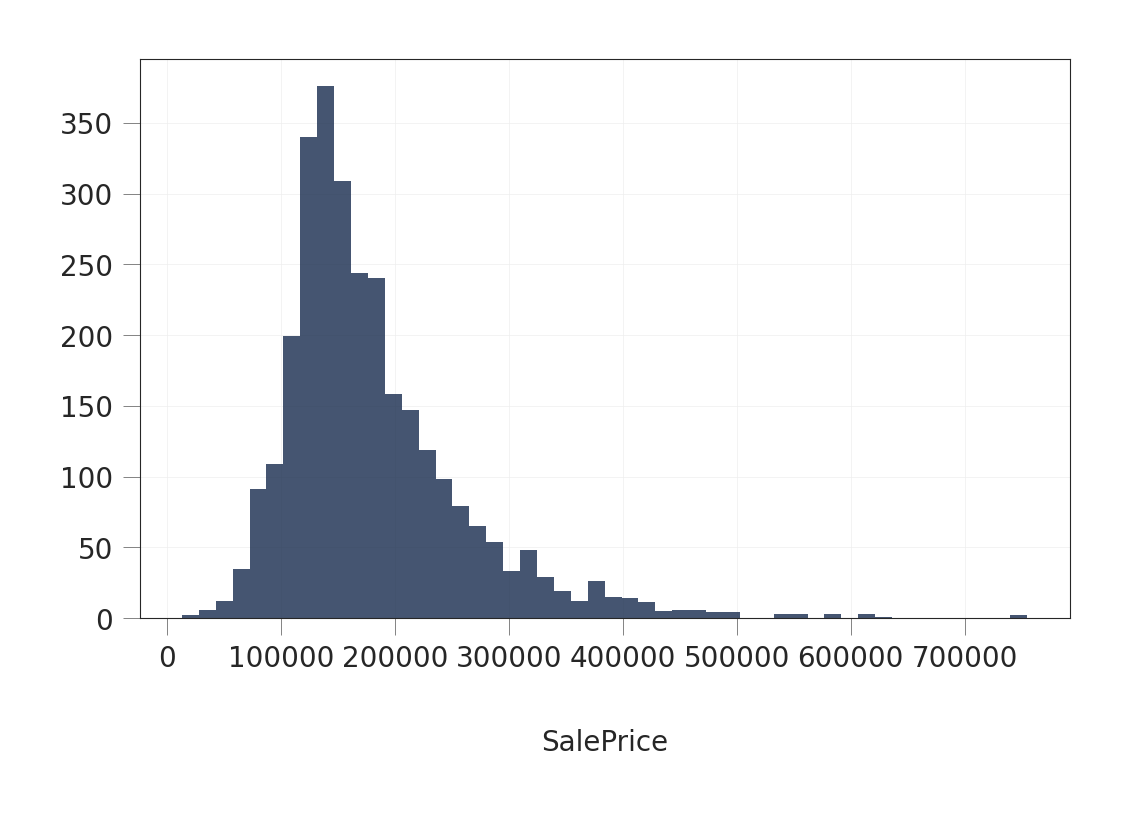

In [ ]:
sns.distplot(dataset['SalePrice'], kde=False,
             color="#172B4D", hist_kws={"alpha": 0.8});

From the three plots above, we can understand the distribution of `SalePrice`. Now let's get some numerical statistical information about it:

In [ ]:
y_train.describe(include=[np.number])

,SalePrice
count,2193.00
mean,179846.69
std,79729.38
min,12789.00
25%,128500.00
50%,159895.00
75%,214000.00
max,625000.00


We can see that the mean is `179,846.69` and the median is `159,895`. We can see also that the first quartile is `128,500`; this means that 75% of the data is larger than this number. Now looking at XGBoost error of `12,556.68`, we can say that an error of about `12,000` is good for data whose mean is `159,895` and whose 75% of it is larger than `128,500`.

## Feature Importances

Some of the models we used provide the ability to see the importance of each feature in the dataset after fitting the model. We will look at the feature importances provided by both XGBoost and Random Forest models. We have 242 features in our data which is a big number, so we will take a look at the 15 most important features.

### XGBoost

Let's discover the most important features as determined by XGBoost model:

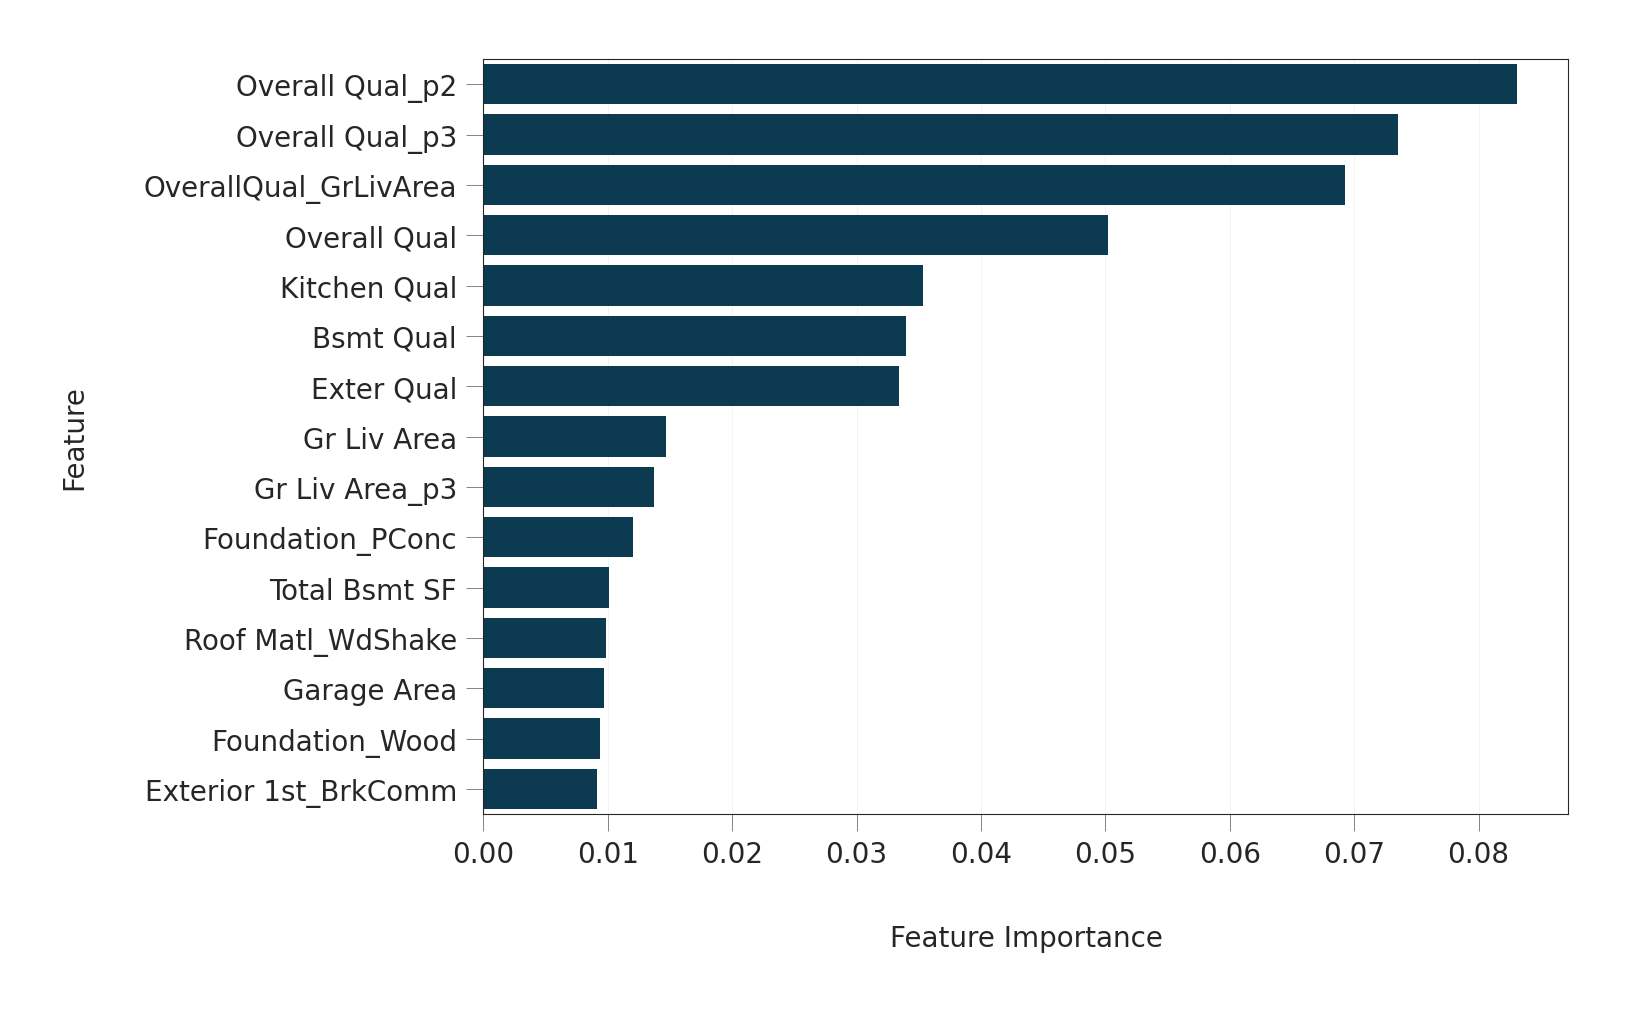

In [ ]:
xgb_feature_importances = xgb_model.feature_importances_
xgb_feature_importances = pd.Series(
    xgb_feature_importances, index=X_train.columns.values
    ).sort_values(ascending=False).head(15)

fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x=xgb_feature_importances, 
            y=xgb_feature_importances.index, 
            color="#003f5c");
plt.xlabel('Feature Importance');
plt.ylabel('Feature');

### Random Forest

Now, let's see the most important features as for Random Forest model:

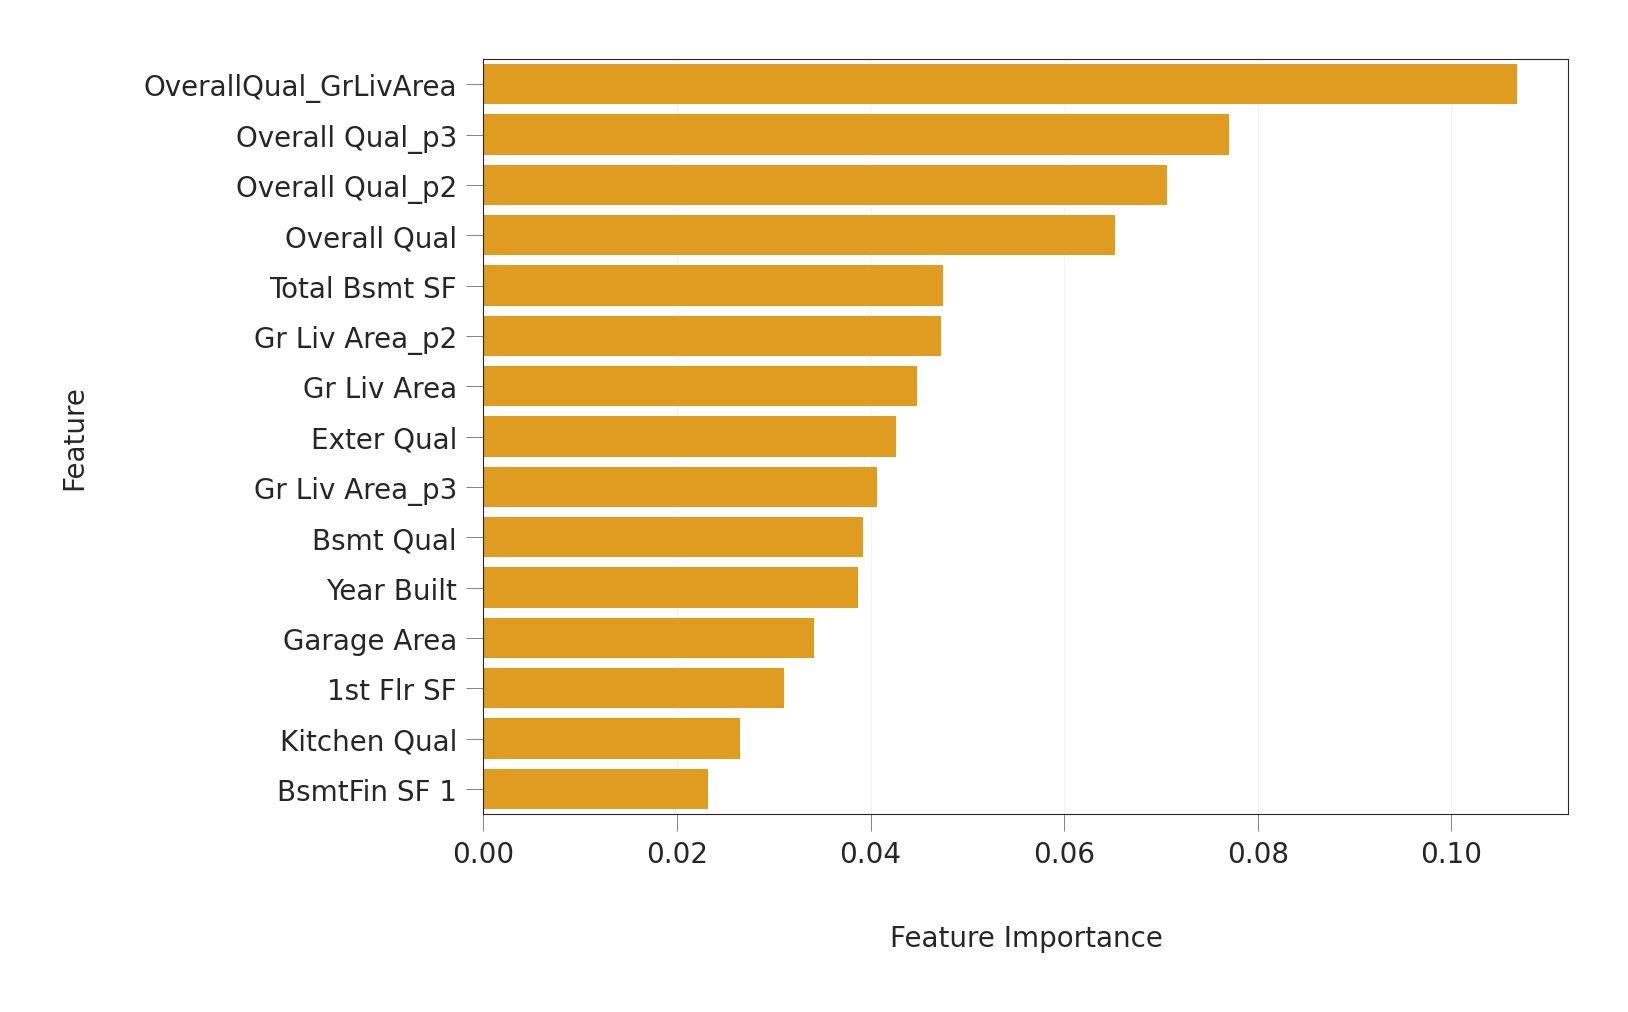

In [ ]:
rf_feature_importances = rf_model.feature_importances_
rf_feature_importances = pd.Series(
    rf_feature_importances, index=X_train.columns.values
    ).sort_values(ascending=False).head(15)

fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x=rf_feature_importances, 
            y=rf_feature_importances.index, 
            color="#ffa600");
plt.xlabel('Feature Importance');
plt.ylabel('Feature');

### Common Important Features

Now, let us see which features are among the most important features for both XGBoost and Random Forest models, and let's find out the difference in their importance regarding the two models:

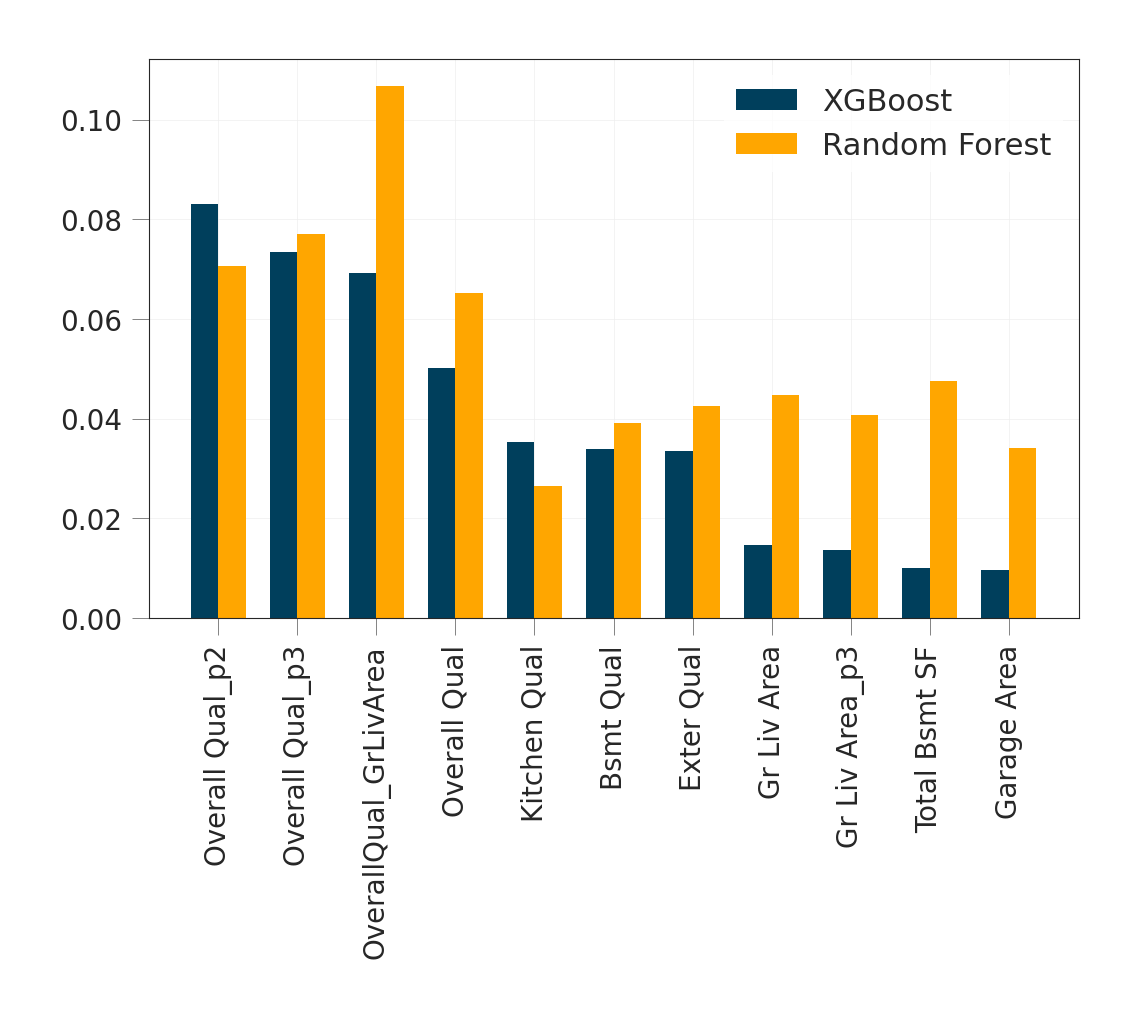

In [ ]:
common_imp_feat = [x for x in xgb_feature_importances.index 
                   if x in rf_feature_importances.index]
commImpFeat_xgb_scores = [xgb_feature_importances[x] 
                          for x in common_imp_feat]
commImpFeat_rf_scores = [rf_feature_importances[x] 
                         for x in common_imp_feat]

ind = np.arange(len(commImpFeat_xgb_scores))
width = 0.35

fig, ax = plt.subplots()
ax.bar(ind - width/2, commImpFeat_xgb_scores, width,
       color='#003f5c', label='XGBoost');
ax.bar(ind + width/2, commImpFeat_rf_scores, width, 
       color='#ffa600', label='Random Forest')
ax.set_xticks(ind);
ax.set_xticklabels(common_imp_feat);
ax.legend();
plt.xticks(rotation=90);

<h1 id="conclusions">Conclusion</h1>

In this paper, we built serveral regression models to predict the price of some house given some of the house features. We eveluated and compared each model to determine the one with highest performance. We also looked at how some models rank the features according to their importance. In this paper, we followed the data science process starting with getting the data, then cleaning and preprocessing the data, followed by exploring the data and building models, then evaluating the results and communicating them with visualizations.

As a recommendation, we advise to use this model (or a version of it trained with more recent data) by people who want to buy a house in the area covered by the dataset to have an idea about the actual price. The model can be used also with datasets that cover different cities and areas provided that they contain the same features. We also suggest that people take into consideration the features that were deemed as most important as seen in the previous section; this might help them estimate the house price better.

<h1 id="ref">References

Alkhatib, K., Najadat, H., Hmeidi, I., & Shatnawi, M. K. A. (2013). Stock price prediction using k-nearest neighbor (kNN) algorithm. International Journal of Business, Humanities and Technology, 3(3), 32-44.

de Abril, I. M., & Sugiyama, M. (2013). Winning the kaggle algorithmic trading challenge with the composition of many models and feature engineering. IEICE transactions on information and systems, 96(3), 742-745.

Feng, Y., & Jones, K. (2015, July). Comparing multilevel modelling and artificial neural networks in house price prediction. In Spatial Data Mining and Geographical Knowledge Services (ICSDM), 2015 2nd IEEE International Conference on (pp. 108-114). IEEE.

Hegazy, O., Soliman, O. S., & Salam, M. A. (2014). A machine learning model for stock market prediction. arXiv preprint arXiv:1402.7351.

Ticknor, J. L. (2013). A Bayesian regularized artificial neural network for stock market forecasting. Expert Systems with Applications, 40(14), 5501-5506.

De Cock, D. (2011). Ames, Iowa: Alternative to the Boston housing data as an end of semester regression project. Journal of Statistics Education, 19(3).
